# Wrangle 2025

This code reformats the LTRM data to be in the format of (location, year, hydrological data, each fish species presence/absence).

For reference: [Data Dictionary](https://www.umesc.usgs.gov/cgi-bin/ltrmp/fish/fish_meta.pl)
***

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

From Kristen Bouska:

Merge the ltrm fish data with the aquatic areas dataset. Did a spatial merge and did not otherwise alter the data structure. The dataset here includes all sites where daytime electrofishing was used in Pools 4, 8 and 13. Removed sites that had ‘summary’ codes as 1 or 2, which indicate gear failure or an inaccessible site.

Following the field ‘batchno’ are fields associated with Aquatic Areas I and Aquatic Areas III. The field ‘AQUA_CODE3’ indicates contiguous floodplain lakes as ‘CFL’ and has a suite of associated metrics that follow, some of which may be explanatory for lentic fish clusters.

If we want to differentiate areas in the ‘impounded area’ of a pool, the field ‘AQUA_CODE1’ indicates those as ‘CIMP.’ Alternatively, included are river mile (‘RMILE’) and a rescaled river mile metric (‘RM_rescale’) as an approach to contrast upstream and downstream portions of the reach.

In [61]:
df_data = pd.read_csv("ltrm_fish_D_p4813_aa1_aa3_all.csv", low_memory=False)
pd.options.display.max_columns = None  # to display all columns
print(df_data.shape) # shows the number of rows and columns
df_data.head()

(314004, 176)


,site,barcode,fstation,sitetype,stratum,sdate,stime,fdate,ftime,pool,lcode,gear,period,rep,summary,project,effdist,effhr,effmin,pwrgoal,pwrused,volts,v_qf,amps,a_qf,pulses,p_qf,dutycyc,dc_qf,utmzone,utm_e,utm_n,gisgrid,zone15e,zone15n,gpsmeth,gpsacc,secchi,s_qf,temp,t_qf,depth,d_qf,cond,c_qf,current,cv_qf,do,do_qf,stageht,sh_qf,sveg92,vegd,eveg92,esveg92,substrt,snag,wingdyke,trib,riprap,inout,closing,flooded,othrstrc,labind,contanrs,shtcnt,totfishc,leader,pageno,rec_site,rownum,fishcode,length,tfs,grp_wdth,catch,weight,pathcode,subproj,userdef,recorder,nfsh_cnt,orphflag,batchno,OBJECTID_1,Join_Count,TARGET_FID,OBJECTID_12,AQUA_CODE_AA1,OBJECTID_12_13,Join_Count_1,TARGET_FID_1,OBJECTID_12_13_14,uniq_id,aa_num,AQUA_CODE_AA3,AQUA_DESC,pool_1,Area,Perimeter,Acres,Hectares,bath_pct,max_depth,avg_depth,sd_depth,tot_vol,area_gt50,area_gt100,area_gt200,area_gt300,avg_fetch,sdi,econ,sill,min_rm,max_rm,len_met,len_outl,pct_outl,num_outl,len_oute,pct_oute,num_oute,pct_aqveg,pct_opwat,len_terr,pct_terr,pct_chan,len_wetf,pct1wetf,pct2wetf,len_wd,wdl_p_m2,num_wd,sco_wd,psco_wd,len_revln,rev_p_m2,num_rev,pct_rev,pct_rev2,area_tpi1,pct_tpi1,area_tpi2,pct_tpi2,area_tpi3,pct_tpi3,area_tpi4,pct_tpi4,sinuosity,year_phot,FID_1,comm_TA,avg_group_,ratio,ID,uniq_id_1,avg_dept_1,avg_fetc_1,pct_chan_1,hect,Field11,FID_12,comm_TA_1,avg_group1,ratio_1,ID_1,uniq_id_12,avg_dept_2,avg_fetc_2,pct_chan_2,hect_1,RMILE,RM_rescale
0,NaN,13000524,3,0,IMP-S,7/12/1994,9:40,7/12/1994,9:55,13,D18.RS,D,1,NaN,5.0,M-,200.0,NaN,15,3394.0,3520.0,220.0,NaN,16.0,NaN,60.0,NaN,25.0,NaN,15,736908,4642751,73695.64255,736908,4642751,1.0,0.2,60.0,2.0,25.9,NaN,0.6,NaN,306.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,NaN,1.0,12,NaN,1.0,1.0,1.0,SNGR,246.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,201.0,12.0,0,9401,6754,1,6754,702.0,CIMP,6754,1,6754,1004.0,P13_CFL_200,1004.0,CFL,Contiguous Floodplain Lake,P13,16783827.12,42663.7284,4147.374004,1678.382712,97.959928,5.91,1.05058,0.398636,17025389.0,15331033.0,8777131.885,153333.4296,32969.77506,3.067405,2.937706,23.933951,546202.7924,522.579468,528.235291,9102.141791,24285.11305,56.922154,4.0,1612.891223,3.780474,14.0,76.196592,23.803408,16765.72413,39.297372,60.702628,10094.54659,23.660723,60.209428,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2010.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,6.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,523,1.0
1,NaN,13000524,3,0,IMP-S,7/12/1994,9:40,7/12/1994,9:55,13,D18.RS,D,1,NaN,5.0,M-,200.0,NaN,15,3394.0,3520.0,220.0,NaN,16.0,NaN,60.0,NaN,25.0,NaN,15,736908,4642751,73695.64255,736908,4642751,1.0,0.2,60.0,2.0,25.9,NaN,0.6,NaN,306.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,NaN,1.0,12,NaN,1.0,1.0,2.0,SNGR,620.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,201.0,12.0,0,9401,6755,1,6755,702.0,CIMP,6755,1,6755,1004.0,P13_CFL_200,1004.0,CFL,Contiguous Floodplain Lake,P13,16783827.12,42663.7284,4147.374004,1678.382712,97.959928,5.91,1.05058,0.398636,17025389.0,15331033.0,8777131.885,153333.4296,32969.77506,3.067405,2.937706,23.933951,546202.7924,522.579468,528.235291,9102.141791,24285.11305,56.922154,4.0,1612.891223,3.780474,14.0,76.196592,23.803408,16765.72413,39.297372,60.702628,10094.54659,23.660723,60.209428,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2010.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,6.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,523,1.0
2,NaN,13000524,3,0,IMP-S,7/12/1994,9:40,7/12/1994,9:55,13,D18.RS,D,1,NaN,5.0,M-,200.0,NaN,15,3394.0,3520.0,220.0,NaN,16.0,NaN,60.0,NaN,25.0,NaN,15,736908,4642751,73695.64255,736908,4642751,1.0,0.2,60.0,2.0,25.9,NaN

-   Filter to keep only rows where the fishcode column is not missing. 
-   Remove unknown fish codes (those starting with 'U-') and NFSH = no fish
-   Create a new column year by converting the sdate column to datetime and extracting the year component.

In [62]:
df_data = df_data[df_data['fishcode'].notna()].reset_index(drop=True)
# remove fishcode NFSH and unknown fish codes (those starting with 'U-')
df_data = df_data[(~df_data['fishcode'].str.startswith('U-')) & (df_data['fishcode'] != 'NFSH')].reset_index(drop=True)
df_data['year'] = pd.to_datetime(df_data['sdate']).dt.year
print(df_data.shape)

(313015, 177)


## Filter Further for Analysis

Filter to period 3.

In [63]:
df = df_data[df_data['period'] == 3].reset_index(drop=True)
print(df.shape)

(127700, 177)


Only some of the columns are relevant, so we will drop the rest. 

In [64]:
keep_cols =['utm_e', 'utm_n', 'barcode', 'year', 'sdate', 'pool', 'fishcode', 'temp', 'depth', 'current', 'do',
              'esveg92', 'substrt', 'cond', 'snag', 'riprap', 'inout', 'flooded']
df = df[keep_cols].reset_index(drop=True)
print(df.shape)
df['year'].min()

(127700, 18)


1993

## Missing data

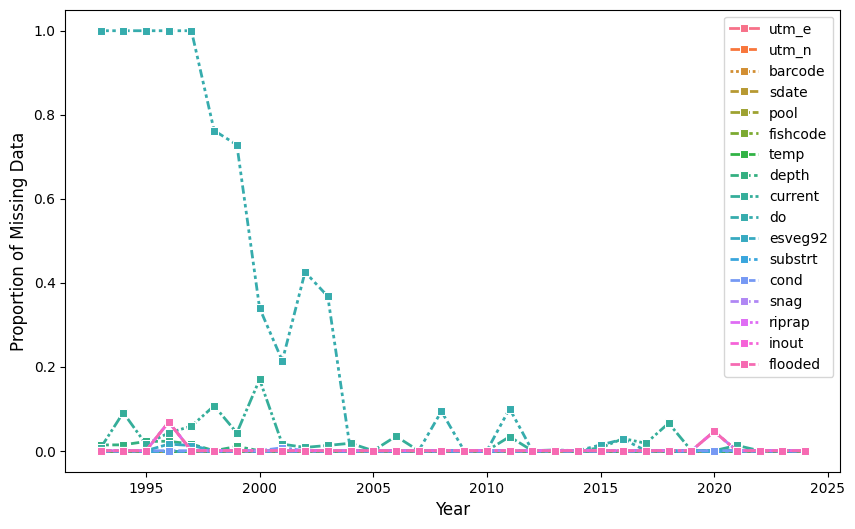

In [65]:
yearly_missing_df = df.groupby('year').apply(lambda x: x.isna().mean(), include_groups=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(
    data = yearly_missing_df,
    ax = ax,
    linewidth = 2,
    marker = 's'
)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Proportion of Missing Data", fontsize = 12);

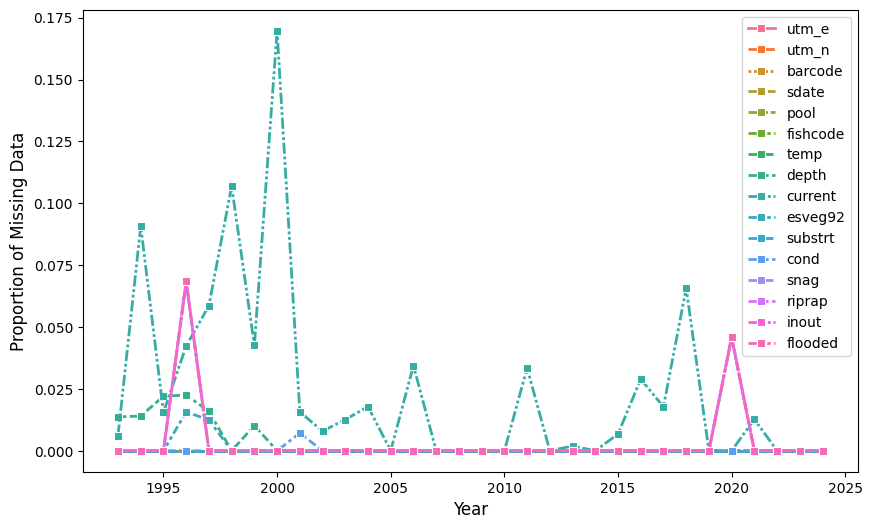

In [66]:
df_nodo = df.drop(columns=['do']).reset_index(drop=True)
yearly_missing_df = df_nodo.groupby('year').apply(lambda x: x.isna().mean(), include_groups=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(
    data = yearly_missing_df,
    ax = ax,
    linewidth = 2,
    marker = 's'
)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Proportion of Missing Data", fontsize = 12);

Keeps only complete cases (rows with no missing data) in the selected columns

In [67]:
#df = df[(df['year'] >= 2004) & (df.isna().sum(axis=1) == 0)].reset_index(drop=True)
df = df[df.isna().sum(axis=1) == 0].reset_index(drop=True)
print(df.shape) # shows the number of rows and columns
df.head()
df['year'].min()

(95631, 18)


1998

In [68]:
print(f"Number of unique samples (identified by barcode)= {df.barcode.unique().shape[0]}")
print(f"Number of unique fishcodes = {df.fishcode.unique().shape[0]}")

Number of unique samples (identified by barcode)= 1733
Number of unique fishcodes = 94


Remove hybrid fish codes

In [69]:
hybrid_fish = ['BCWC', 'BGLE', 'BGOS', 'BGRS', 'BGWM', 'CCGF', 'GSBG', 'GSPS', 'GSRS', 'GSWM', 'LNST', 'OSLE', 'PSBG', 'PSOS', 'PSWM', 'SBWB', 'SCBS', 'SGWE', 'SNPD', 'WPYB']  
no_hybrid = df[~df['fishcode'].isin(hybrid_fish)].reset_index(drop=True)
print("before ", df.shape)
print("hybrid removed ", no_hybrid.shape)

before  (95631, 18)
hybrid removed  (95575, 18)


In [ ]:
#df choices....original = df, no_hybrid, comb_hybrid

agg_df = no_hybrid.groupby(['barcode']).agg(
    year=('year', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    utm_e=('utm_e', 'median'),
    utm_n=('utm_n', 'median'),
    median_temp=('temp', 'median'),
    median_depth=('depth', 'median'),
    median_current=('current', 'median'),
    median_do=('do', 'median'),
    median_esveg92=('esveg92', 'median'),    
    mode_substrt=('substrt', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    median_cond=('cond', 'median'),
    snag_present=('snag', 'max'),
    riprap_present=('riprap', 'max'),
    inout_present=('inout', 'max'),
    flooded_present=('flooded', 'max'),
    mode_pool=('pool', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    fish_codes=('fishcode', lambda x: list(x)) # all fish observed on that date
).reset_index()

# Expand fish counts (instead of presence/absence)
unique_fish = set([item for sublist in agg_df['fish_codes'] for item in sublist])

# Create count columns for each fish species
fish_df = pd.DataFrame({
    fish: agg_df['fish_codes'].apply(lambda x: x.count(fish)) 
    for fish in unique_fish
})

agg_df = pd.concat([agg_df, fish_df], axis=1)   
agg_df.drop(columns=['fish_codes'], inplace=True)

# Add richness column (number of unique species, not total count)
agg_df['richness'] = (fish_df > 0).sum(axis=1)
fish_df['richness'] = (fish_df > 0).sum(axis=1)

Summarize the dataset by grouping by BARCODE, then aggregating environmental and categorical variables, and finally expand fish species presence into separate columns.
-   Numerical columns (e.g., temp, depth, current, do, esveg92, cond) are summarized by their median value for each year/pool combination.
-   Categorical columns (e.g., substrt, pool) use the mode (most frequent value).
-   Presence/absence columns (e.g., snag, riprap, inout, flooded) use the maximum value, assuming binary encoding (0/1).
-   Fish codes are aggregated into a list of all fish species observed in each group.

In [70]:
#df choices....original = df, no_hybrid, comb_hybrid

agg_df = no_hybrid.groupby(['barcode']).agg(
    year=('year', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    utm_e=('utm_e', 'median'),
    utm_n=('utm_n', 'median'),
    median_temp=('temp', 'median'),
    median_depth=('depth', 'median'),
    median_current=('current', 'median'),
    median_do=('do', 'median'),
    median_esveg92=('esveg92', 'median'),    
    mode_substrt=('substrt', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    median_cond=('cond', 'median'),
    snag_present=('snag', 'max'),
    riprap_present=('riprap', 'max'),
    inout_present=('inout', 'max'),
    flooded_present=('flooded', 'max'),
    mode_pool=('pool', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    fish_codes=('fishcode', lambda x: list(x)) # all fish observed on that date
).reset_index()

# Expand fish presence/absence
unique_fish = set([item for sublist in agg_df['fish_codes'] for item in sublist])
# Create only fish presence/absence columns
fish_df = pd.DataFrame({fish: agg_df['fish_codes'].apply(lambda x: fish in x) for fish in unique_fish})
agg_df = pd.concat([agg_df, fish_df], axis=1)   
agg_df.drop(columns=['fish_codes'], inplace=True)
# Add richness column
agg_df['richness'] = fish_df.sum(axis=1)
fish_df['richness'] = fish_df.sum(axis=1)

In [30]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, cophenet
np.random.seed(42)
X = np.random.randint(0,2, size=fish_df.shape)
D_jaccard = pdist(X, metric='jaccard')
D_euclidean = pdist(X, metric='euclidean')
methods = {
    "simple (Jaccard)": ('single', D_jaccard),
    "complete (Jaccard)": ('complete', D_jaccard),
    "average (Jaccard)": ('average', D_jaccard),
    "ward (Euclidean)": ('ward', D_euclidean)   
}
results = []
for label, (method, D) in methods.items():
    Z = linkage(D, method=method)
    coph_corr, _ = cophenet(Z, D)
    results.append({
        'method': label,
        'cophenetic_correlation': coph_corr
    })
results_df = pd.DataFrame(results)
results_df.sort_values(by='cophenetic_correlation', ascending=False).reset_index
print(results_df)


               method  cophenetic_correlation
0    simple (Jaccard)                0.423429
1  complete (Jaccard)                0.081799
2   average (Jaccard)                0.374442
3    ward (Euclidean)                0.092684


    num_clusters  silhouette_score  calinski_harabasz_score  \
0             10          0.094378                52.753296   
1             11          0.094078                47.519657   
2             12          0.093488                43.603322   
3             13          0.085796                40.818485   
4             14          0.083291                37.732997   
5             15          0.075737                35.491124   
6             16          0.078551                34.758904   
7             17          0.077852                32.814697   
8             18          0.074252                33.211405   
9             19          0.074477                33.902720   
10            20          0.071989                32.196279   
11            21          0.072935                30.643069   
12            22          0.071468                29.431905   
13            23          0.066774                28.251722   
14            24          0.060307                27.04

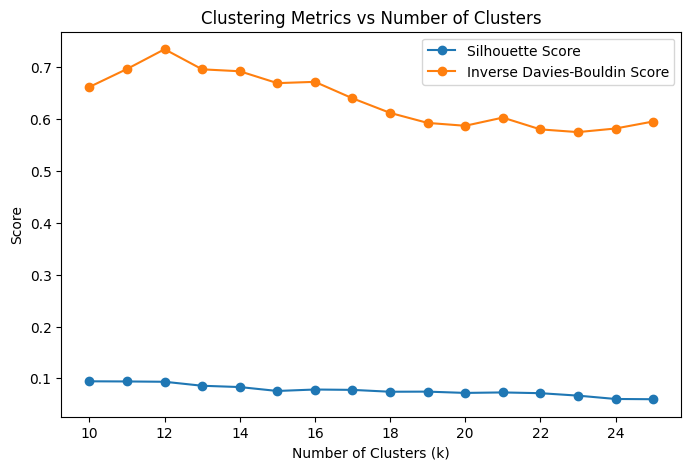

In [47]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
dist_matrix_jac = pdist(1*fish_df, metric='jaccard') 
dist_df_jac = pd.DataFrame(squareform(dist_matrix_jac))
linked_jaccard = linkage(dist_matrix_jac, method='average')

results = []
for k in range(10,26):
    labels = fcluster(linked_jaccard, k, criterion='maxclust')

    sil = silhouette_score(dist_df_jac, labels, metric='precomputed')
    ch = calinski_harabasz_score(dist_df_jac, labels)
    db = davies_bouldin_score(dist_df_jac, labels)

    results.append({
        'num_clusters': k,
        'silhouette_score': sil,
        'calinski_harabasz_score': ch,
        'davies_bouldin_score': db
    })
results_df = pd.DataFrame(results)
results_df['db_inv'] = 1 / results_df['davies_bouldin_score']

print(results_df)

plt.figure(figsize=(8, 5))
plt.plot(results_df['num_clusters'], results_df['silhouette_score'], marker='o', label='Silhouette Score')
#plt.plot(results_df['num_clusters'], results_df['calinski_harabasz_score'], marker='o', label='Calinski-Harabasz Score')
plt.plot(results_df['num_clusters'], results_df['db_inv'], marker='o', label='Inverse Davies-Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Clustering Metrics vs Number of Clusters')
plt.legend()
plt.show()  

In [26]:
fish_df.head()

,BMBF,CMMW,WTBS,GDSN,LGPH,RVSN,NHSK,WLYE,NTPK,RRDR,LNGR,LMBS,RESF,YWBS,BUSK,SGER,RVCS,GZSD,CARP,STCT,YWPH,SMBS,HFCS,OSSF,SPSK,BKSS,SHDR,SVLP,CNLP,RKBS,BKBF,RVRH,TTPH,MNEY,SVRH,SFSN,LKSG,CNCF,GSOS,GSPK,BDDR,BKBH,SVMW,MDDR,WTSK,BHMW,SHCB,PNSD,GNSF,LSSR,SMBF,SNSN,MMSN,GDRH,WTCP,PDFH,BKSB,BRBT,BSDR,BLGL,WDSN,SVCB,PGMW,ERSN,SNGR,PRPH,FHCF,CLDR,STSN,PDSN,JYDR,BNMW,FWDM,ABLP,BNBH,MQTF,YLBH,FHMW,QLBK,BWFN,WRMH,WSDR,BKCP,FTDR,IODR,SHRH,TPMT,richness
0,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,16
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,11
2,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False,True,True,20
3,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,14
4,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,14


# Agglomerative  Cluster Analysis
## Outliers
Before we perform the agglomerative clustering, we removed assemblages that are considered substantial outliers. To define these outliers, we computed the pairwise distances between assemblages, and found the median distance to each other assemblage, per-assemblage. This was done for both the cosine and SPAM metrics defined earlier. The resulting distributions are provided below. 


In [71]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

fish_df.shape

(1733, 88)

To stay consistent with previous ecological analyses we will only use the Jaccard distance metric for clustering.

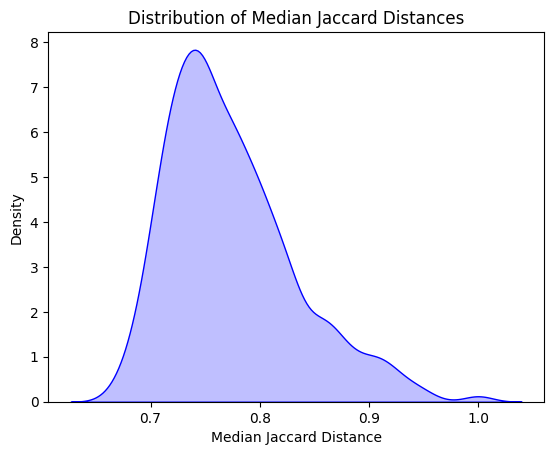

In [72]:
dist_matrix_jac = pdist(1*fish_df, metric='jaccard') 
dist_df_jac = pd.DataFrame(squareform(dist_matrix_jac))

sns.kdeplot(dist_df_jac.median(axis=0), fill=True, color="blue")
plt.xlabel("Median Jaccard Distance")
plt.ylabel("Density")
plt.title("Distribution of Median Jaccard Distances")
plt.show()

Possible outlier, but will not remove any data points.

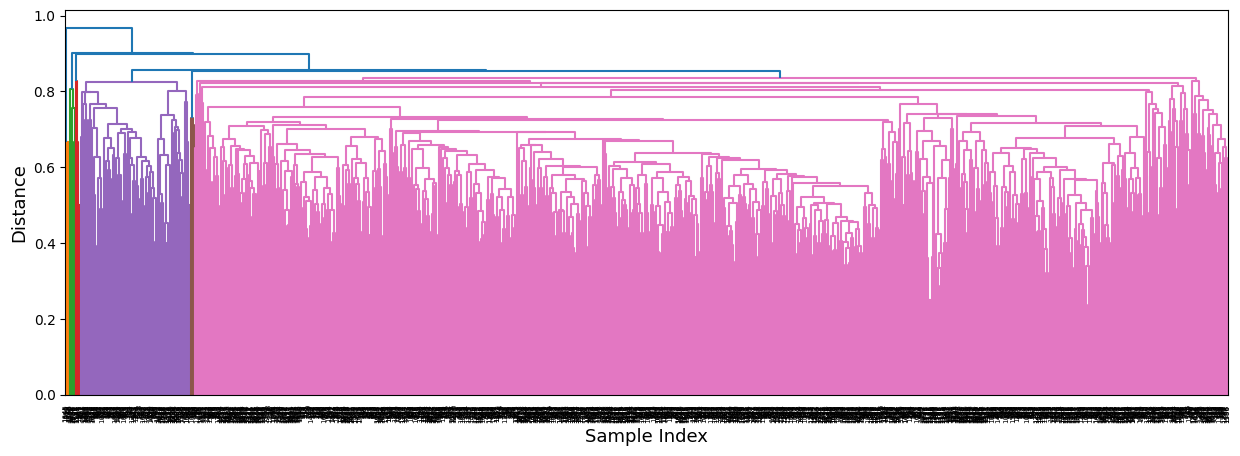

cluster
1       6
2       9
3       8
4     164
5       6
6    1540
dtype: int64


In [74]:
from scipy.cluster.hierarchy import dendrogram 

linked_jaccard = linkage(dist_matrix_jac, method='average')

cluster_threshold = 0.85
plt.figure(figsize=(15, 5))
dendrogram(linked_jaccard, color_threshold=cluster_threshold) # you can change this value to change the number of clusters you get
plt.xlabel("Sample Index", fontsize=13)
plt.ylabel("Distance", fontsize=13)
plt.show()

agg_df['cluster'] = fcluster(linked_jaccard, t=cluster_threshold, criterion='distance')
fish_df['cluster'] = agg_df['cluster']
print(agg_df.groupby('cluster').size())

Silhouette analysis to determine optimal number of clusters.

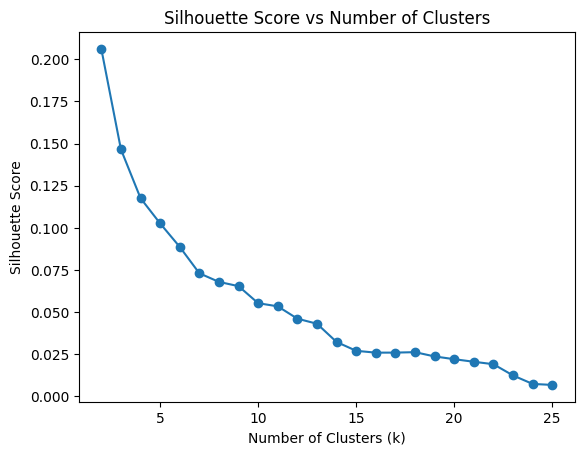

Optimal number of clusters based on silhouette score: 2


In [75]:
max_clusters = 25
scores = []

for k in range(2, max_clusters + 1):
    labels = fcluster(linked_jaccard, k, criterion='maxclust')
    sil = silhouette_score(dist_df_jac, labels, metric='precomputed')
    scores.append({'num_clusters': k, 'silhouette_score': sil})

plt.plot(range(2, max_clusters + 1), [s['silhouette_score'] for s in scores], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

best_k = max(scores, key=lambda x: x['silhouette_score'])['num_clusters']
print(f"Optimal number of clusters based on silhouette score: {best_k}")

### Bootstrapping Ckuster Analysis to Determine Optimal Clustering Threshold

Bootstrapping methods test different clustering thresholds to determine which threshold produces the most robust clusters. Here, we test thresholds from 0.70 to 0.85, in increments of 0.01. For each threshold, we record the number of clusters with more than 10 members, and the number of small clusters (less than 10 members). The optimal threshold should maximize the number of large clusters while minimizing the number of small clusters.

BOOTSTRAPPING CLUSTER STABILITY ANALYSIS

Running bootstrap analysis (this may take a few minutes)...
  Testing threshold 0.86...

Bootstrap analysis complete!


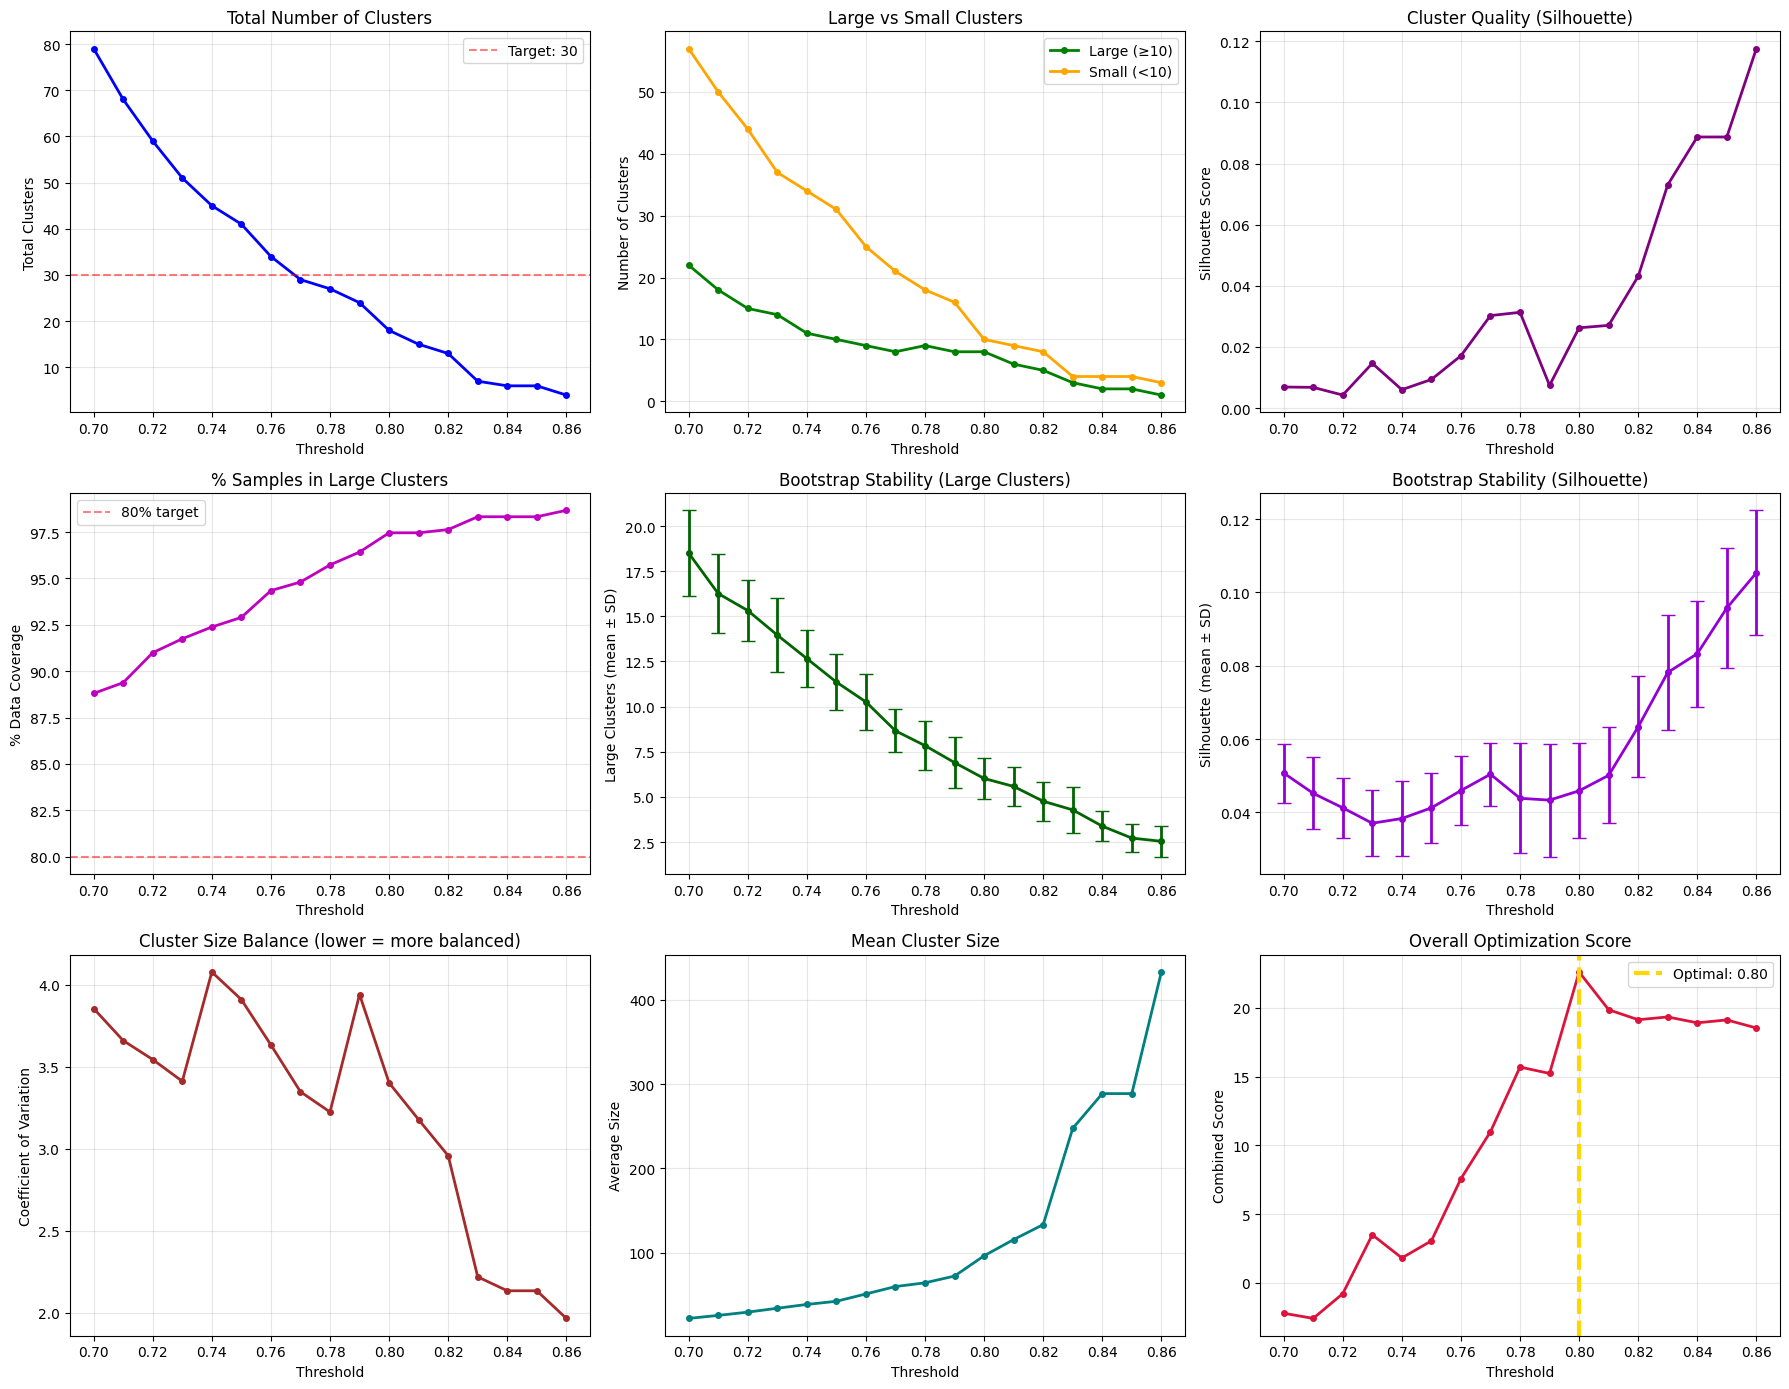


THRESHOLD RECOMMENDATIONS

1. TOP 5 THRESHOLDS (by optimization score):
----------------------------------------------------------------------
 threshold  num_large_clusters  num_small_clusters  silhouette_score  pct_in_large_clusters  optimization_score
      0.80                   8                  10          0.026271              97.461050           22.597620
      0.81                   6                   9          0.027071              97.461050           19.853625
      0.83                   3                   4          0.073061              98.326601           19.329909
      0.82                   5                   8          0.043127              97.634160           19.127233
      0.85                   2                   4          0.088713              98.326601           19.112690

⚠️  No thresholds found in 'sweet spot' range. Consider adjusting criteria.

3. MOST STABLE THRESHOLD (lowest bootstrap variance):
----------------------------------------------------

In [81]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def bootstrap_cluster_stability(linkage_matrix, distance_matrix, threshold, n_bootstrap=100, sample_frac=0.8):
    """
    Bootstrap resampling to assess cluster stability at a given threshold.
    
    Parameters:
    -----------
    linkage_matrix : array
        Hierarchical clustering linkage matrix
    distance_matrix : DataFrame
        Pairwise distance matrix
    threshold : float
        Distance threshold for cutting dendrogram
    n_bootstrap : int
        Number of bootstrap iterations
    sample_frac : float
        Fraction of data to sample in each iteration
    
    Returns:
    --------
    dict : Stability metrics
    """
    n_samples = distance_matrix.shape[0]
    sample_size = int(n_samples * sample_frac)
    
    cluster_counts = []
    large_cluster_counts = []
    silhouette_scores = []
    
    for i in range(n_bootstrap):
        # Random sample with replacement
        sample_idx = np.random.choice(n_samples, size=sample_size, replace=True)
        
        # Create sub-distance matrix
        sub_dist = distance_matrix.iloc[sample_idx, sample_idx]
        
        # Perform clustering on subsample
        from scipy.cluster.hierarchy import linkage
        sub_linkage = linkage(sub_dist.values[np.triu_indices(len(sample_idx), k=1)], method='average')
        
        # Cut dendrogram at threshold
        labels = fcluster(sub_linkage, t=threshold, criterion='distance')
        
        # Calculate metrics
        cluster_sizes = pd.Series(labels).value_counts()
        cluster_counts.append(len(cluster_sizes))
        large_cluster_counts.append((cluster_sizes >= 10).sum())
        
        # Silhouette score
        if len(np.unique(labels)) > 1:
            sil = silhouette_score(sub_dist, labels, metric='precomputed')
            silhouette_scores.append(sil)
    
    return {
        'mean_clusters': np.mean(cluster_counts),
        'std_clusters': np.std(cluster_counts),
        'mean_large_clusters': np.mean(large_cluster_counts),
        'std_large_clusters': np.std(large_cluster_counts),
        'mean_silhouette': np.mean(silhouette_scores) if silhouette_scores else np.nan,
        'std_silhouette': np.std(silhouette_scores) if silhouette_scores else np.nan
    }


# Bootstrap analysis across threshold range
print("=" * 70)
print("BOOTSTRAPPING CLUSTER STABILITY ANALYSIS")
print("=" * 70)

thresholds = np.arange(0.70, 0.86, 0.01)
n_bootstrap = 50  # Reduce if computation is too slow

bootstrap_results = []

print("\nRunning bootstrap analysis (this may take a few minutes)...")

for threshold in thresholds:
    print(f"  Testing threshold {threshold:.2f}...", end='\r')
    
    # Get clusters for full dataset
    clusters = fcluster(linked_jaccard, t=threshold, criterion='distance')
    cluster_sizes = pd.Series(clusters).value_counts()
    
    # Bootstrap stability
    stability = bootstrap_cluster_stability(
        linked_jaccard, 
        dist_df_jac, 
        threshold, 
        n_bootstrap=n_bootstrap
    )
    
    # Calculate metrics on full dataset
    num_clusters = len(cluster_sizes)
    num_large = (cluster_sizes >= 10).sum()
    num_small = (cluster_sizes < 10).sum()
    avg_size = cluster_sizes.mean()
    max_size = cluster_sizes.max()
    
    # Calculate silhouette on full dataset
    if num_clusters > 1:
        sil_full = silhouette_score(dist_df_jac, clusters, metric='precomputed')
    else:
        sil_full = np.nan
    
    # Percentage in large clusters
    large_cluster_ids = cluster_sizes[cluster_sizes >= 10].index
    pct_in_large = (pd.Series(clusters).isin(large_cluster_ids).sum() / len(clusters)) * 100
    
    # Cluster balance (coefficient of variation)
    cv_cluster_size = cluster_sizes.std() / cluster_sizes.mean()
    
    bootstrap_results.append({
        'threshold': threshold,
        'num_clusters': num_clusters,
        'num_large_clusters': num_large,
        'num_small_clusters': num_small,
        'avg_cluster_size': avg_size,
        'max_cluster_size': max_size,
        'pct_in_large_clusters': pct_in_large,
        'silhouette_score': sil_full,
        'cv_cluster_size': cv_cluster_size,
        'bootstrap_mean_large': stability['mean_large_clusters'],
        'bootstrap_std_large': stability['std_large_clusters'],
        'bootstrap_mean_sil': stability['mean_silhouette'],
        'bootstrap_std_sil': stability['std_silhouette']
    })

print("\n\nBootstrap analysis complete!")

# Convert to DataFrame
bootstrap_df = pd.DataFrame(bootstrap_results)

# Calculate optimization score
# Higher is better: maximize large clusters, minimize small clusters, maximize stability
bootstrap_df['optimization_score'] = (
    bootstrap_df['num_large_clusters'] * 2 +  # Weight large clusters
    bootstrap_df['pct_in_large_clusters'] / 5 +  # Reward high coverage
    bootstrap_df['silhouette_score'] * 20 -  # Reward good separation
    bootstrap_df['num_small_clusters'] * 1 -  # Penalize small clusters
    bootstrap_df['bootstrap_std_large'] * 3  # Penalize instability
)

# Create comprehensive visualization
fig, axes = plt.subplots(3, 3, figsize=(18, 14))

# Plot 1: Number of clusters
axes[0, 0].plot(bootstrap_df['threshold'], bootstrap_df['num_clusters'], 'b-o', markersize=4, linewidth=2)
axes[0, 0].axhline(y=30, color='r', linestyle='--', alpha=0.5, label='Target: 30')
axes[0, 0].set_xlabel('Threshold')
axes[0, 0].set_ylabel('Total Clusters')
axes[0, 0].set_title('Total Number of Clusters')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Large vs Small clusters
axes[0, 1].plot(bootstrap_df['threshold'], bootstrap_df['num_large_clusters'], 'g-o', 
                markersize=4, linewidth=2, label='Large (≥10)')
axes[0, 1].plot(bootstrap_df['threshold'], bootstrap_df['num_small_clusters'], 'orange', 
                marker='o', markersize=4, linewidth=2, label='Small (<10)')
axes[0, 1].set_xlabel('Threshold')
axes[0, 1].set_ylabel('Number of Clusters')
axes[0, 1].set_title('Large vs Small Clusters')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Silhouette score
axes[0, 2].plot(bootstrap_df['threshold'], bootstrap_df['silhouette_score'], 'purple', 
                marker='o', markersize=4, linewidth=2)
axes[0, 2].set_xlabel('Threshold')
axes[0, 2].set_ylabel('Silhouette Score')
axes[0, 2].set_title('Cluster Quality (Silhouette)')
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Percentage in large clusters
axes[1, 0].plot(bootstrap_df['threshold'], bootstrap_df['pct_in_large_clusters'], 'm-o', 
                markersize=4, linewidth=2)
axes[1, 0].axhline(y=80, color='r', linestyle='--', alpha=0.5, label='80% target')
axes[1, 0].set_xlabel('Threshold')
axes[1, 0].set_ylabel('% Data Coverage')
axes[1, 0].set_title('% Samples in Large Clusters')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Bootstrap stability (large clusters)
axes[1, 1].errorbar(bootstrap_df['threshold'], bootstrap_df['bootstrap_mean_large'], 
                    yerr=bootstrap_df['bootstrap_std_large'], fmt='o-', 
                    capsize=5, markersize=4, linewidth=2, color='darkgreen')
axes[1, 1].set_xlabel('Threshold')
axes[1, 1].set_ylabel('Large Clusters (mean ± SD)')
axes[1, 1].set_title('Bootstrap Stability (Large Clusters)')
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Bootstrap stability (silhouette)
axes[1, 2].errorbar(bootstrap_df['threshold'], bootstrap_df['bootstrap_mean_sil'], 
                    yerr=bootstrap_df['bootstrap_std_sil'], fmt='o-', 
                    capsize=5, markersize=4, linewidth=2, color='darkviolet')
axes[1, 2].set_xlabel('Threshold')
axes[1, 2].set_ylabel('Silhouette (mean ± SD)')
axes[1, 2].set_title('Bootstrap Stability (Silhouette)')
axes[1, 2].grid(True, alpha=0.3)

# Plot 7: Cluster size variability
axes[2, 0].plot(bootstrap_df['threshold'], bootstrap_df['cv_cluster_size'], 'brown', 
                marker='o', markersize=4, linewidth=2)
axes[2, 0].set_xlabel('Threshold')
axes[2, 0].set_ylabel('Coefficient of Variation')
axes[2, 0].set_title('Cluster Size Balance (lower = more balanced)')
axes[2, 0].grid(True, alpha=0.3)

# Plot 8: Average cluster size
axes[2, 1].plot(bootstrap_df['threshold'], bootstrap_df['avg_cluster_size'], 'teal', 
                marker='o', markersize=4, linewidth=2)
axes[2, 1].set_xlabel('Threshold')
axes[2, 1].set_ylabel('Average Size')
axes[2, 1].set_title('Mean Cluster Size')
axes[2, 1].grid(True, alpha=0.3)

# Plot 9: Optimization score
axes[2, 2].plot(bootstrap_df['threshold'], bootstrap_df['optimization_score'], 'crimson', 
                marker='o', markersize=4, linewidth=2)
best_threshold = bootstrap_df.loc[bootstrap_df['optimization_score'].idxmax(), 'threshold']
axes[2, 2].axvline(x=best_threshold, color='gold', linestyle='--', linewidth=3, 
                   label=f'Optimal: {best_threshold:.2f}')
axes[2, 2].set_xlabel('Threshold')
axes[2, 2].set_ylabel('Combined Score')
axes[2, 2].set_title('Overall Optimization Score')
axes[2, 2].legend()
axes[2, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed recommendations
print("\n" + "=" * 70)
print("THRESHOLD RECOMMENDATIONS")
print("=" * 70)

# Top 5 by optimization score
print("\n1. TOP 5 THRESHOLDS (by optimization score):")
print("-" * 70)
top_5 = bootstrap_df.nlargest(5, 'optimization_score')
print(top_5[['threshold', 'num_large_clusters', 'num_small_clusters', 
             'silhouette_score', 'pct_in_large_clusters', 'optimization_score']].to_string(index=False))

# Sweet spot (10-25 large clusters, >70% coverage, high silhouette)
sweet_spot = bootstrap_df[
    (bootstrap_df['num_large_clusters'] >= 10) & 
    (bootstrap_df['num_large_clusters'] <= 25) &
    (bootstrap_df['pct_in_large_clusters'] >= 70) &
    (bootstrap_df['silhouette_score'] >= bootstrap_df['silhouette_score'].quantile(0.6))
]

if not sweet_spot.empty:
    print("\n2. 'SWEET SPOT' THRESHOLDS:")
    print("   (10-25 large clusters, >70% coverage, good silhouette)")
    print("-" * 70)
    sweet_spot_sorted = sweet_spot.sort_values('optimization_score', ascending=False)
    print(sweet_spot_sorted[['threshold', 'num_large_clusters', 'pct_in_large_clusters', 
                              'silhouette_score']].to_string(index=False))
    
    # Recommended threshold
    recommended = sweet_spot_sorted.iloc[0]
    print(f"\n{'*' * 70}")
    print(f"🎯 RECOMMENDED THRESHOLD: {recommended['threshold']:.3f}")
    print(f"{'*' * 70}")
    print(f"   Large clusters (≥10 samples): {recommended['num_large_clusters']:.0f}")
    print(f"   Small clusters (<10 samples): {recommended['num_small_clusters']:.0f}")
    print(f"   Data coverage: {recommended['pct_in_large_clusters']:.1f}%")
    print(f"   Silhouette score: {recommended['silhouette_score']:.3f}")
    print(f"   Bootstrap stability (SD): {recommended['bootstrap_std_large']:.2f}")
else:
    print("\n⚠️  No thresholds found in 'sweet spot' range. Consider adjusting criteria.")

# Most stable threshold
most_stable = bootstrap_df.loc[bootstrap_df['bootstrap_std_large'].idxmin()]
print(f"\n3. MOST STABLE THRESHOLD (lowest bootstrap variance):")
print("-" * 70)
print(f"   Threshold: {most_stable['threshold']:.3f}")
print(f"   Large clusters: {most_stable['num_large_clusters']:.0f} ± {most_stable['bootstrap_std_large']:.2f}")
print(f"   Silhouette: {most_stable['bootstrap_mean_sil']:.3f} ± {most_stable['bootstrap_std_sil']:.3f}")

print("\n" + "=" * 70)

In [49]:
# Display summary statistics
print(threshold_df)

# Optional: Show detailed info at specific thresholds
print("\n=== Key Thresholds ===")
for t in [0.70, 0.75, 0.81, 0.85]:
    row = threshold_df[threshold_df['threshold'].round(2) == t]
    if not row.empty:
        print(f"Threshold {t}: {row['num_clusters_gt1'].values[0]} clusters (size>1), "
              f"{row['num_singletons'].values[0]} singletons")

NameError: name 'threshold_df' is not defined

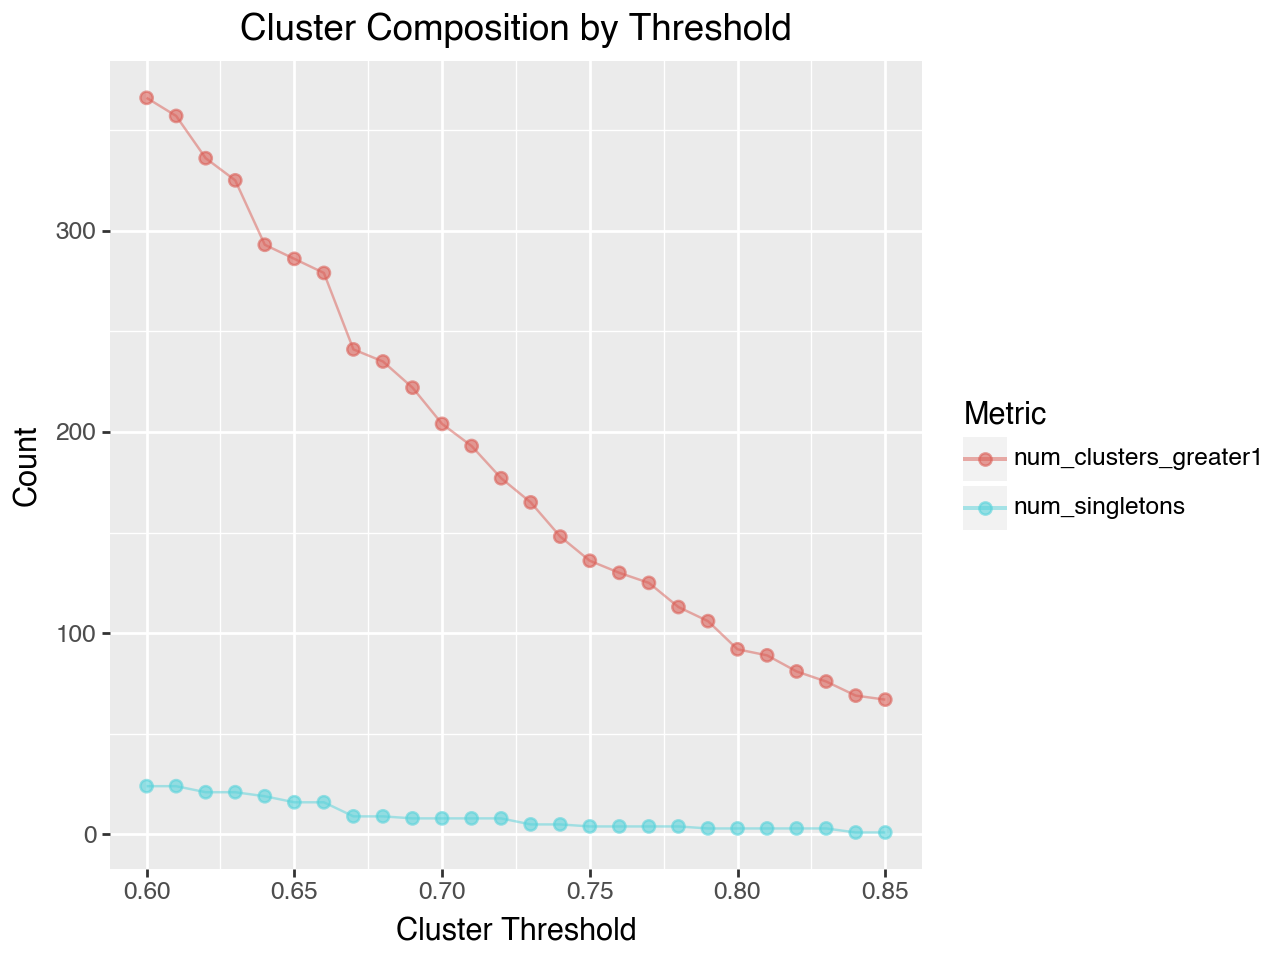

In [50]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal

# Test different threshold values
threshold_results = []

# Create range of thresholds from 0.6 to 0.85
thresholds = np.arange(0.60, 0.86, 0.01)

for cluster_threshold in thresholds:
    # Create clusters with current threshold
    clusters = fcluster(linked_jaccard, t=cluster_threshold, criterion='distance')
    
    # Count clusters with size > 1
    cluster_sizes = pd.Series(clusters).value_counts()
    num_clusters_gt1 = (cluster_sizes > 1).sum()
    
    # Store results
    threshold_results.append({
        'threshold': cluster_threshold,
        'num_clusters_greater1': num_clusters_gt1,
        'total_clusters': len(cluster_sizes),
        'num_singletons': (cluster_sizes == 1).sum()
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(threshold_results)

# # Create scatter plot
# (ggplot(threshold_df, aes(x='threshold', y='num_clusters_gt1')) +
#  geom_point(size=3, color='blue', alpha=0.6) +
#  geom_line(alpha=0.3) +
#  labs(x='Cluster Threshold', 
#       y='Number of Clusters (size > 1)', 
#       title='Cluster Count by Threshold Value') +
#  theme_minimal()
# )

# Plot showing both metrics
threshold_long = threshold_df.melt(
    id_vars='threshold', 
    value_vars=['num_clusters_greater1', 'num_singletons'],
    var_name='metric', 
    value_name='count'
)

(ggplot(threshold_long, aes(x='threshold', y='count', color='metric')) +
 geom_point(size=2, alpha=0.6) +
 geom_line(alpha=0.5) +
 labs(x='Cluster Threshold', 
      y='Count', 
      title='Cluster Composition by Threshold',
      color='Metric')
       # +
 #theme_minimal()
)

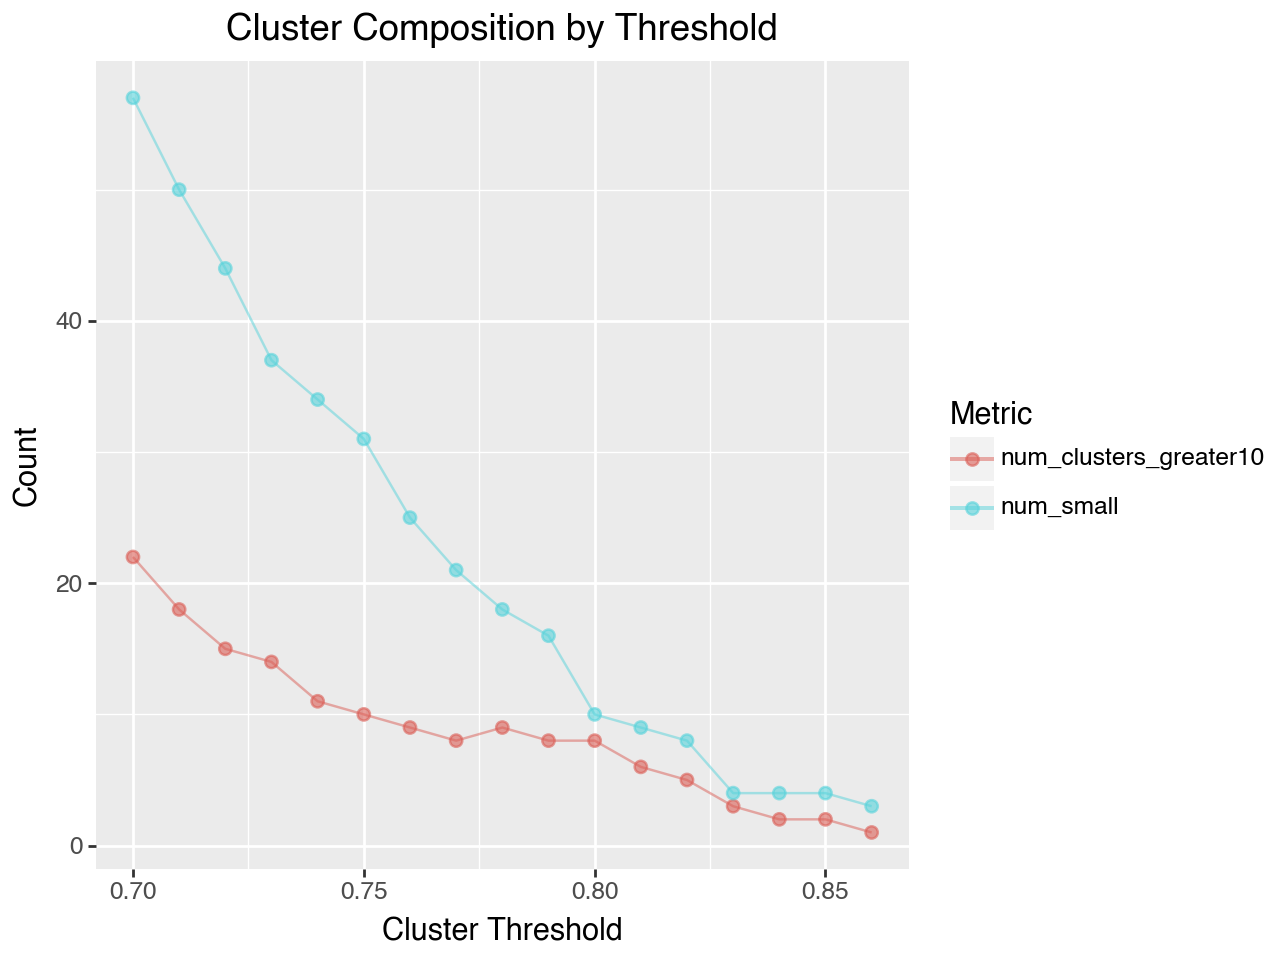

In [84]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal

# Test different threshold values
threshold_results = []

# Create range of thresholds from 0.6 to 0.85
thresholds = np.arange(0.70, 0.86, 0.01)

for cluster_threshold in thresholds:
    # Create clusters with current threshold
    clusters = fcluster(linked_jaccard, t=cluster_threshold, criterion='distance')
    
    # Count clusters with size > 1
    cluster_sizes = pd.Series(clusters).value_counts()
    num_clusters_gt10 = (cluster_sizes >= 10).sum()
    
    # Store results
    threshold_results.append({
        'threshold': cluster_threshold,
        'num_clusters_greater10': num_clusters_gt10,
        'total_clusters': len(cluster_sizes),
        'num_small': (cluster_sizes < 10).sum()
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(threshold_results)

# # Create scatter plot
# (ggplot(threshold_df, aes(x='threshold', y='num_clusters_gt1')) +
#  geom_point(size=3, color='blue', alpha=0.6) +
#  geom_line(alpha=0.3) +
#  labs(x='Cluster Threshold', 
#       y='Number of Clusters (size > 1)', 
#       title='Cluster Count by Threshold Value') +
#  theme_minimal()
# )

# Plot showing both metrics
threshold_long = threshold_df.melt(
    id_vars='threshold', 
    value_vars=['num_clusters_greater10', 'num_small'],
    var_name='metric', 
    value_name='count'
)

(ggplot(threshold_long, aes(x='threshold', y='count', color='metric')) +
 geom_point(size=2, alpha=0.6) +
 geom_line(alpha=0.5) +
 labs(x='Cluster Threshold', 
      y='Count', 
      title='Cluster Composition by Threshold',
      color='Metric')
       # +
 #theme_minimal()
)

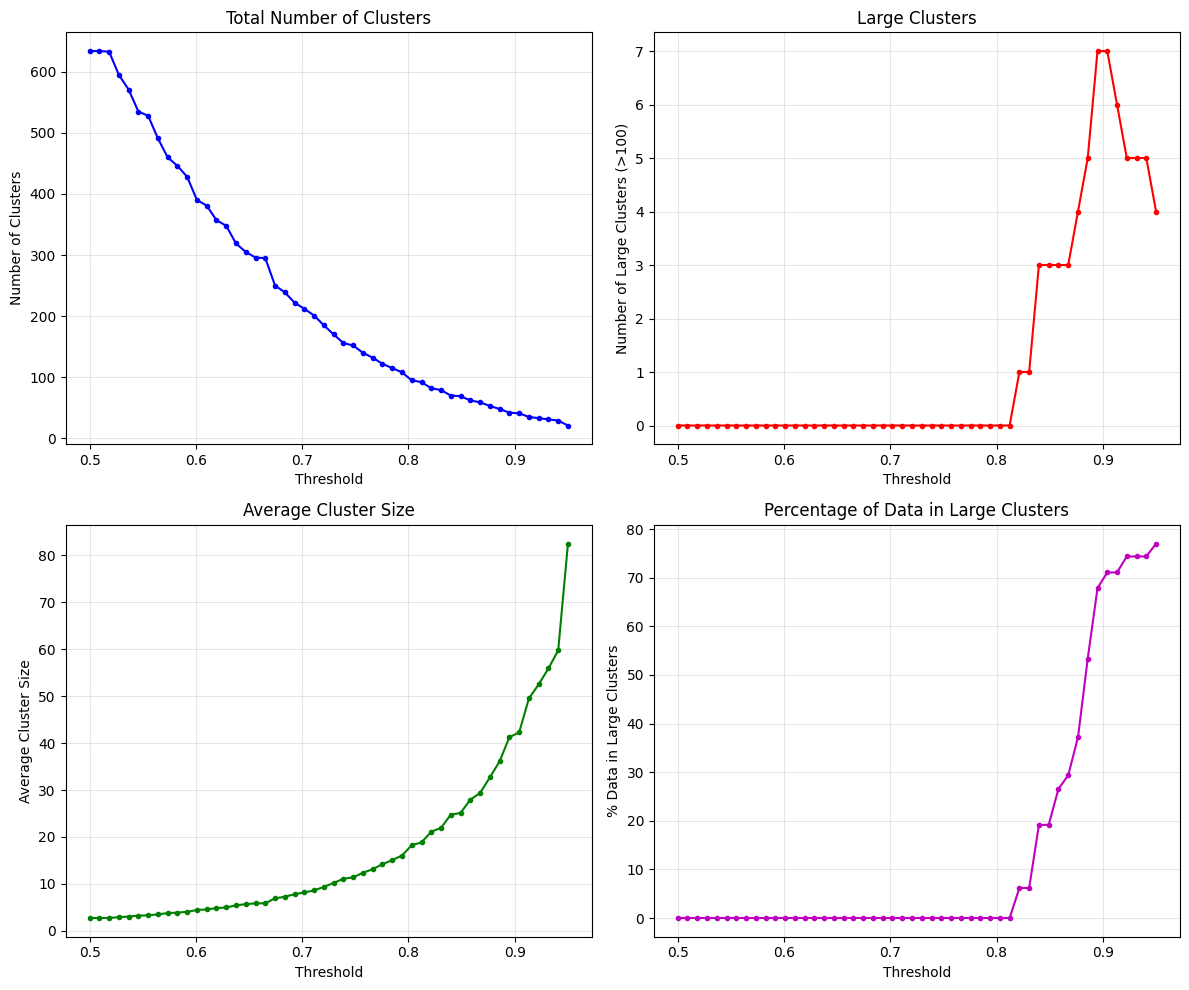


=== Top candidates for elbow point ===

Based on rate of change in number of clusters:
    threshold  num_clusters  num_clusters_change
19   0.674490           250                 45.0
3    0.527551           595                 38.0
11   0.601020           390                 38.0
7    0.564286           491                 37.0
5    0.545918           535                 36.0

Based on number of large clusters (4-10 range):
    threshold  num_large_clusters  pct_clustered
41   0.876531                   4      37.160992
42   0.885714                   5      53.375649
43   0.894898                   7      67.859204
44   0.904082                   7      71.090594
45   0.913265                   6      71.090594
46   0.922449                   5      74.379688
47   0.931633                   5      74.379688
48   0.940816                   5      74.379688
49   0.950000                   4      77.034045


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

# Create range of thresholds
thresholds = np.linspace(0.5, 0.95, 50)

# Store metrics for each threshold
metrics = {
    'threshold': [],
    'num_clusters': [],
    'num_large_clusters': [],  # clusters with >100 samples
    'avg_cluster_size': [],
    'pct_clustered': []  # % of data in clusters >100
}

for t in thresholds:
    clusters = fcluster(linked_jaccard, t=t, criterion='distance')
    cluster_sizes = pd.Series(clusters).value_counts()
    
    metrics['threshold'].append(t)
    metrics['num_clusters'].append(len(cluster_sizes))
    metrics['num_large_clusters'].append((cluster_sizes >= 100).sum())
    metrics['avg_cluster_size'].append(cluster_sizes.mean())
    
    # Calculate % of data in "large" clusters
    large_cluster_ids = cluster_sizes[cluster_sizes >= 100].index
    pct = (pd.Series(clusters).isin(large_cluster_ids).sum() / len(clusters)) * 100
    metrics['pct_clustered'].append(pct)

metrics_df = pd.DataFrame(metrics)

# Create elbow plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Number of clusters
axes[0, 0].plot(metrics_df['threshold'], metrics_df['num_clusters'], 'b-o', markersize=3)
axes[0, 0].set_xlabel('Threshold')
axes[0, 0].set_ylabel('Number of Clusters')
axes[0, 0].set_title('Total Number of Clusters')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Number of large clusters (>100 samples)
axes[0, 1].plot(metrics_df['threshold'], metrics_df['num_large_clusters'], 'r-o', markersize=3)
axes[0, 1].set_xlabel('Threshold')
axes[0, 1].set_ylabel('Number of Large Clusters (>100)')
axes[0, 1].set_title('Large Clusters')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Average cluster size
axes[1, 0].plot(metrics_df['threshold'], metrics_df['avg_cluster_size'], 'g-o', markersize=3)
axes[1, 0].set_xlabel('Threshold')
axes[1, 0].set_ylabel('Average Cluster Size')
axes[1, 0].set_title('Average Cluster Size')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Percentage clustered
axes[1, 1].plot(metrics_df['threshold'], metrics_df['pct_clustered'], 'm-o', markersize=3)
axes[1, 1].set_xlabel('Threshold')
axes[1, 1].set_ylabel('% Data in Large Clusters')
axes[1, 1].set_title('Percentage of Data in Large Clusters')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find elbow using rate of change
metrics_df['num_clusters_change'] = metrics_df['num_clusters'].diff().abs()
metrics_df['large_clusters_change'] = metrics_df['num_large_clusters'].diff().abs()

print("\n=== Top candidates for elbow point ===")
print("\nBased on rate of change in number of clusters:")
print(metrics_df.nlargest(5, 'num_clusters_change')[['threshold', 'num_clusters', 'num_clusters_change']])

print("\nBased on number of large clusters (4-10 range):")
candidates = metrics_df[(metrics_df['num_large_clusters'] >= 4) & (metrics_df['num_large_clusters'] <= 10)]
print(candidates[['threshold', 'num_large_clusters', 'pct_clustered']])

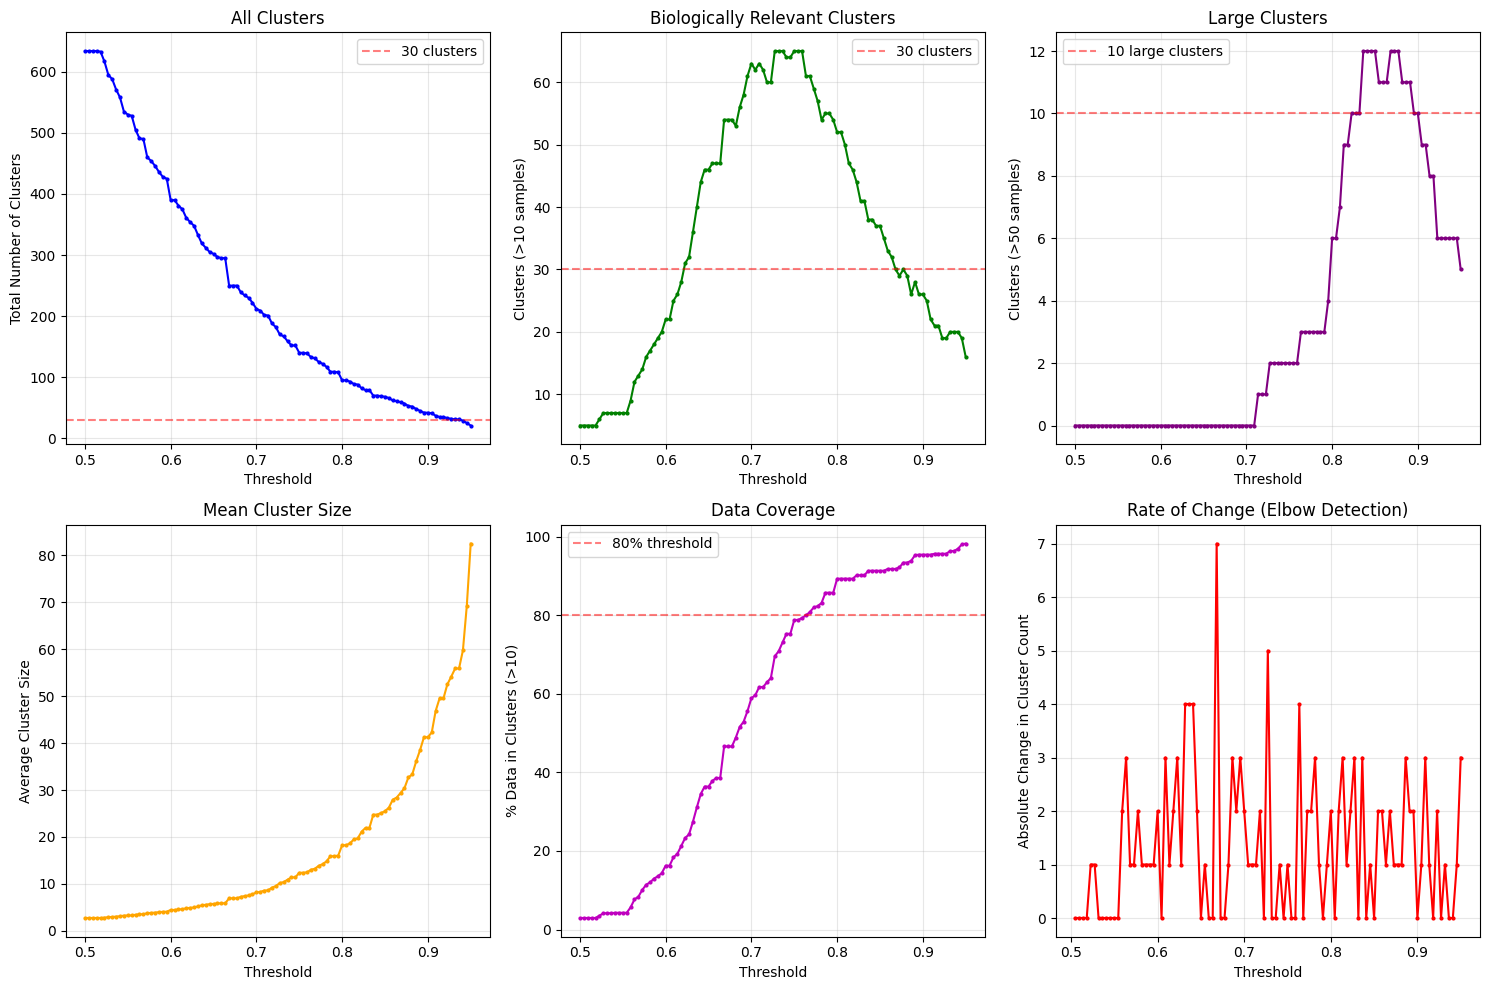


=== CLUSTER THRESHOLD RECOMMENDATIONS ===

Top 5 candidates for <30 biologically relevant clusters (>10 samples):

 threshold  num_clusters_gt10  num_clusters_gt50  avg_cluster_size  pct_in_large_clusters
  0.595455                 20                  0          4.077647              14.368148
  0.931818                 20                  6         55.903226              96.364686
  0.936364                 20                  6         55.903226              96.364686
  0.940909                 20                  6         59.758621              96.941720
  0.590909                 19                  0          4.049065              13.560300


Top 5 'elbow' points (largest rate of change):

 threshold  num_clusters_gt10  clusters_gt10_change
  0.668182                 54                   7.0
  0.727273                 65                   5.0
  0.631818                 36                   4.0
  0.636364                 40                   4.0
  0.640909                 44     

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

# Create a wider range of thresholds to explore
thresholds = np.linspace(0.5, 0.95, 100)

# Store metrics for each threshold
metrics = {
    'threshold': [],
    'num_clusters': [],
    'num_clusters_gt10': [],  # clusters with >10 samples
    'num_clusters_gt50': [],  # clusters with >50 samples
    'avg_cluster_size': [],
    'max_cluster_size': [],
    'pct_in_large_clusters': []  # % of data in clusters >10
}

for t in thresholds:
    clusters = fcluster(linked_jaccard, t=t, criterion='distance')
    cluster_sizes = pd.Series(clusters).value_counts()
    
    metrics['threshold'].append(t)
    metrics['num_clusters'].append(len(cluster_sizes))
    metrics['num_clusters_gt10'].append((cluster_sizes >= 10).sum())
    metrics['num_clusters_gt50'].append((cluster_sizes >= 50).sum())
    metrics['avg_cluster_size'].append(cluster_sizes.mean())
    metrics['max_cluster_size'].append(cluster_sizes.max())
    
    # Calculate % of data in "meaningful" clusters (>10 samples)
    large_cluster_ids = cluster_sizes[cluster_sizes >= 10].index
    pct = (pd.Series(clusters).isin(large_cluster_ids).sum() / len(clusters)) * 100
    metrics['pct_in_large_clusters'].append(pct)

metrics_df = pd.DataFrame(metrics)

# Filter to find thresholds that give < 30 clusters (with >10 samples)
candidates = metrics_df[metrics_df['num_clusters_gt10'] < 30].copy()
candidates['distance_to_target'] = abs(candidates['num_clusters_gt10'] - 20)  # Target ~20 clusters

# Create comprehensive elbow plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Total clusters vs threshold
axes[0, 0].plot(metrics_df['threshold'], metrics_df['num_clusters'], 'b-o', markersize=2)
axes[0, 0].axhline(y=30, color='r', linestyle='--', alpha=0.5, label='30 clusters')
axes[0, 0].set_xlabel('Threshold')
axes[0, 0].set_ylabel('Total Number of Clusters')
axes[0, 0].set_title('All Clusters')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Clusters with >10 samples
axes[0, 1].plot(metrics_df['threshold'], metrics_df['num_clusters_gt10'], 'g-o', markersize=2)
axes[0, 1].axhline(y=30, color='r', linestyle='--', alpha=0.5, label='30 clusters')
axes[0, 1].set_xlabel('Threshold')
axes[0, 1].set_ylabel('Clusters (>10 samples)')
axes[0, 1].set_title('Biologically Relevant Clusters')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Clusters with >50 samples
axes[0, 2].plot(metrics_df['threshold'], metrics_df['num_clusters_gt50'], 'purple', marker='o', markersize=2)
axes[0, 2].axhline(y=10, color='r', linestyle='--', alpha=0.5, label='10 large clusters')
axes[0, 2].set_xlabel('Threshold')
axes[0, 2].set_ylabel('Clusters (>50 samples)')
axes[0, 2].set_title('Large Clusters')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Average cluster size
axes[1, 0].plot(metrics_df['threshold'], metrics_df['avg_cluster_size'], 'orange', marker='o', markersize=2)
axes[1, 0].set_xlabel('Threshold')
axes[1, 0].set_ylabel('Average Cluster Size')
axes[1, 0].set_title('Mean Cluster Size')
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: % in large clusters
axes[1, 1].plot(metrics_df['threshold'], metrics_df['pct_in_large_clusters'], 'm-o', markersize=2)
axes[1, 1].axhline(y=80, color='r', linestyle='--', alpha=0.5, label='80% threshold')
axes[1, 1].set_xlabel('Threshold')
axes[1, 1].set_ylabel('% Data in Clusters (>10)')
axes[1, 1].set_title('Data Coverage')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Rate of change (derivative) for clusters >10
axes[1, 2].plot(metrics_df['threshold'][1:], 
                np.abs(np.diff(metrics_df['num_clusters_gt10'])), 
                'red', marker='o', markersize=2)
axes[1, 2].set_xlabel('Threshold')
axes[1, 2].set_ylabel('Absolute Change in Cluster Count')
axes[1, 2].set_title('Rate of Change (Elbow Detection)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print recommendations
print("\n=== CLUSTER THRESHOLD RECOMMENDATIONS ===\n")
print("Top 5 candidates for <30 biologically relevant clusters (>10 samples):\n")
top_candidates = candidates.nsmallest(5, 'distance_to_target')
print(top_candidates[['threshold', 'num_clusters_gt10', 'num_clusters_gt50', 
                       'avg_cluster_size', 'pct_in_large_clusters']].to_string(index=False))

# Find elbow point using rate of change
metrics_df['clusters_gt10_change'] = metrics_df['num_clusters_gt10'].diff().abs()
elbow_candidates = metrics_df.nlargest(5, 'clusters_gt10_change')

print("\n\nTop 5 'elbow' points (largest rate of change):\n")
print(elbow_candidates[['threshold', 'num_clusters_gt10', 'clusters_gt10_change']].to_string(index=False))

# Sweet spot: 10-25 clusters with >10 samples, >70% data coverage
sweet_spot = metrics_df[
    (metrics_df['num_clusters_gt10'] >= 10) & 
    (metrics_df['num_clusters_gt10'] <= 25) &
    (metrics_df['pct_in_large_clusters'] >= 70)
]

if not sweet_spot.empty:
    print("\n\n'Sweet spot' thresholds (10-25 clusters, >70% coverage):\n")
    print(sweet_spot[['threshold', 'num_clusters_gt10', 'pct_in_large_clusters']].to_string(index=False))
    
    recommended_threshold = sweet_spot.iloc[len(sweet_spot)//2]['threshold']  # Pick middle option
    print(f"\n🎯 RECOMMENDED THRESHOLD: {recommended_threshold:.3f}")
    print(f"   This produces {sweet_spot.iloc[len(sweet_spot)//2]['num_clusters_gt10']:.0f} clusters (>10 samples)")
    print(f"   Covering {sweet_spot.iloc[len(sweet_spot)//2]['pct_in_large_clusters']:.1f}% of your data")


=== CLUSTER SUMMARY (threshold=0.75) ===
Total clusters: 41
Clusters with >10 samples: 10
Clusters with >50 samples: 3

Cluster sizes:
cluster
24    1011
26     364
12      80
13      40
41      31
23      25
29      21
11      18
36      10
27      10
33       9
40       9
9        7
5        7
15       7
2        6
38       6
39       6
31       6
1        6
16       6
34       5
10       4
25       4
17       4
7        3
14       3
35       3
8        2
3        2
dtype: int64


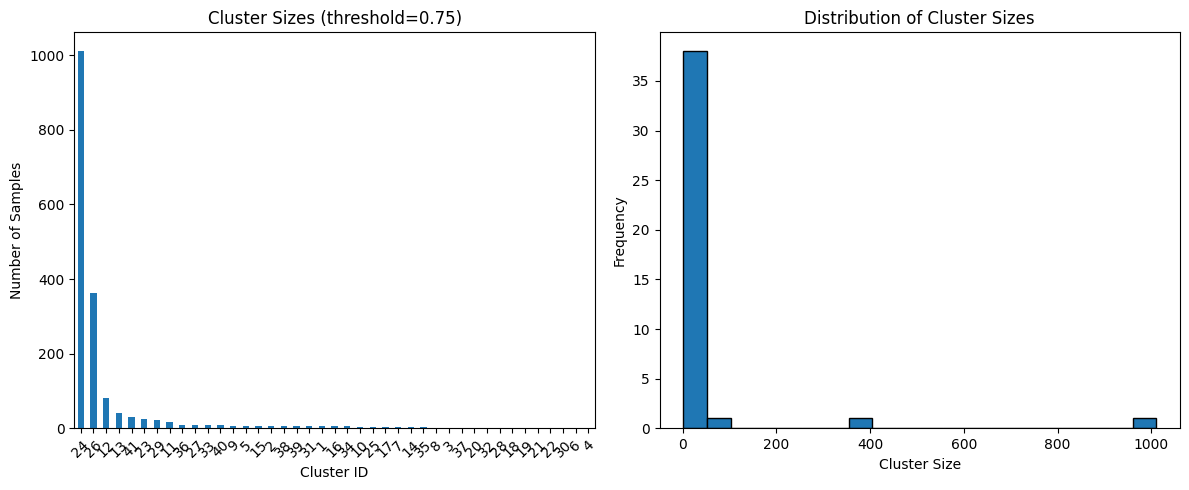

In [86]:
# Apply the recommended threshold
recommended_threshold = 0.75  # Adjust based on output above

agg_df['cluster'] = fcluster(linked_jaccard, t=recommended_threshold, criterion='distance')
fish_df['cluster'] = agg_df['cluster']

# Summary of clusters
cluster_summary = agg_df.groupby('cluster').size().sort_values(ascending=False)
print(f"\n=== CLUSTER SUMMARY (threshold={recommended_threshold}) ===")
print(f"Total clusters: {len(cluster_summary)}")
print(f"Clusters with >10 samples: {(cluster_summary >= 10).sum()}")
print(f"Clusters with >50 samples: {(cluster_summary >= 50).sum()}")
print(f"\nCluster sizes:")
print(cluster_summary.head(30))

# Visualize cluster size distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cluster_summary.plot(kind='bar')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Samples')
plt.title(f'Cluster Sizes (threshold={recommended_threshold})')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.hist(cluster_summary, bins=20, edgecolor='black')
plt.xlabel('Cluster Size')
plt.ylabel('Frequency')
plt.title('Distribution of Cluster Sizes')
plt.tight_layout()
plt.show()

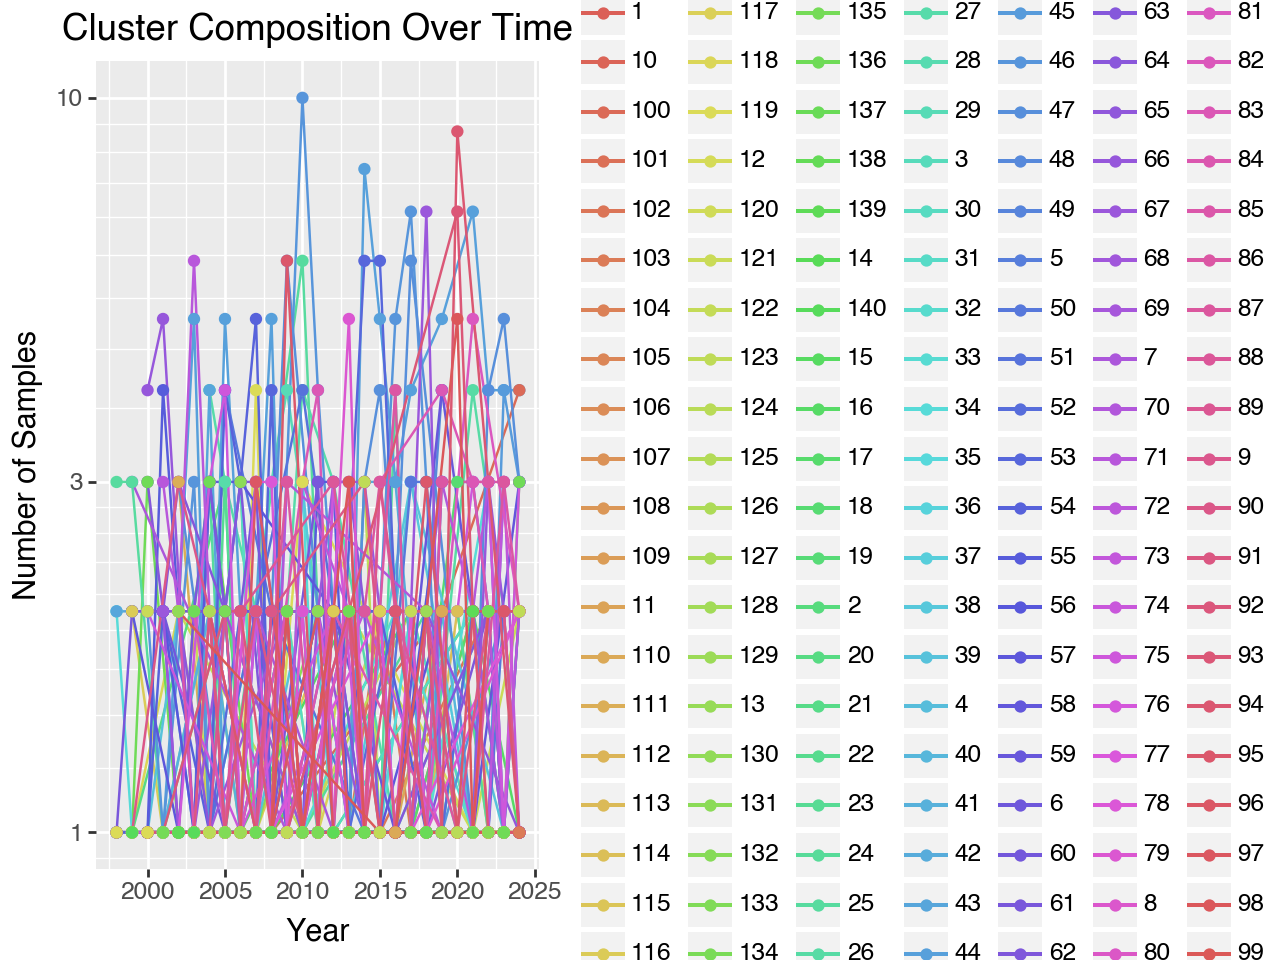

In [53]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, scale_y_log10

# Count samples per year per cluster
cluster_time = agg_df.groupby(['year', 'cluster']).size().reset_index(name='count')
cluster_time['cluster'] = cluster_time['cluster'].astype(str)

# Create the plot
(ggplot(cluster_time, aes(x='year', y='count', color='cluster')) +
 geom_line() +
 geom_point() +
 labs(x='Year', y='Number of Samples', color='Cluster', 
    title='Cluster Composition Over Time') +
 scale_y_log10()
 )

In [54]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, scale_y_log10, facet_wrap

# Count samples per year per cluster per pool
cluster_time_pool = agg_df.groupby(['year', 'cluster', 'mode_pool']).size().reset_index(name='count')
cluster_time_pool['cluster'] = cluster_time_pool['cluster'].astype(str)

# Create the plot with faceting by pool
(ggplot(cluster_time_pool, aes(x='year', y='count', color='cluster')) +
 geom_line() +
 geom_smooth(method = 'lm') +
 geom_point() +
 facet_wrap('~mode_pool') +
 labs(x='Year', y='Number of Samples', color='Cluster', 
    title='Cluster Composition Over Time by Pool') 
    #+
 #scale_y_log10()
 )

NameError: name 'geom_smooth' is not defined

In [ ]:
from plotnine import *

/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats

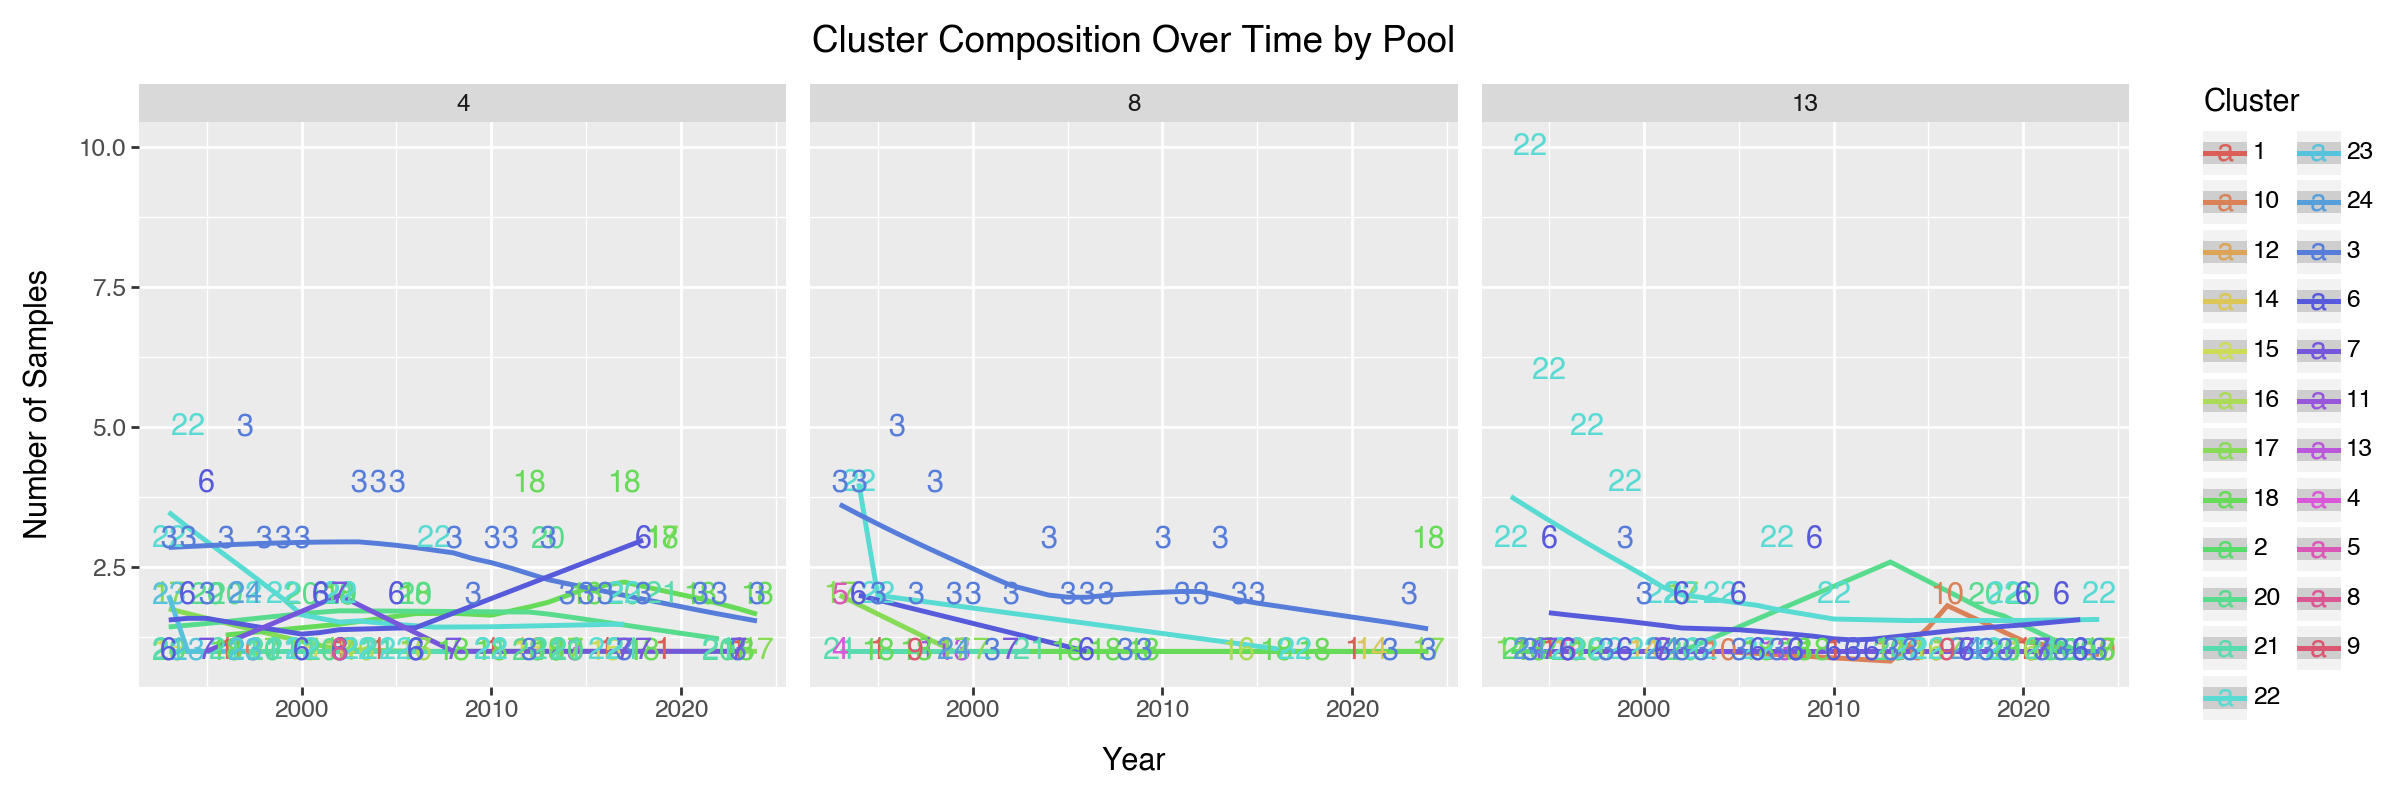

In [110]:
# Count samples per year per cluster per pool
cluster_time_pool = agg_df.groupby(['year', 'cluster', 'mode_pool']).size().reset_index(name='count')
cluster_time_pool['cluster'] = cluster_time_pool['cluster'].astype(str)

# Create the plot with faceting by pool
(ggplot(cluster_time_pool.query('cluster != "19"'), aes(x='year', y='count', color='cluster')) +
# geom_line() +
 #geom_point() +
 facet_wrap('~mode_pool') +
 labs(x='Year', y='Number of Samples', color='Cluster', 
    title='Cluster Composition Over Time by Pool') +
geom_smooth() +
geom_text(aes(label='cluster')) +
 #scale_y_log10() +
 theme(figure_size=(12, 4))  # width=12, height=4 inches
 )

For each cluster, we will summarize the cluster by the median of each environmental variable and the mode of each categorical variable. And then list the fish species and count of each species in the cluster.

In [112]:
# Specify cluster to analyze
cluster_num = 22

# Filter data for this cluster
cluster_data = agg_df[agg_df['cluster'] == cluster_num]
cluster_fish_data = df_data[df_data['barcode'].isin(cluster_data['barcode'])]

# Environmental variables summary (median)
env_vars = ['median_temp', 'median_depth', 'median_current', 'median_esveg92', 'median_cond']
env_summary = cluster_data[env_vars].median()

# Categorical variables summary (mode)
cat_vars = ['mode_substrt']
cat_summary = cluster_data[cat_vars].mode().iloc[0]

# Binary variables summary (proportion present)
binary_vars = ['snag_present', 'riprap_present', 'inout_present', 'flooded_present']
binary_summary = cluster_data[binary_vars].mean()

# Fish species counts
fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].drop(columns=['richness', 'cluster'])
species_counts = fish_in_cluster.sum().sort_values(ascending=False)
species_counts = species_counts[species_counts > 0]

cluster_barcodes = agg_df[agg_df['cluster'] == cluster_num]['barcode']

# Total individuals caught
fish_abundance = df[df['barcode'].isin(cluster_barcodes)].groupby('fishcode').size()
fish_length = cluster_fish_data.groupby('fishcode')['length'].mean()
#fish_weight = cluster_fish_data.groupby('fishcode')['weight'].mean()

# Number of samples where present
fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].drop(columns=['richness', 'cluster'])
fish_occurrence = fish_in_cluster.sum()

# Combine
species_summary = pd.DataFrame({
    'total_caught': fish_abundance,
    'samples': fish_occurrence,
    'mean_length': round(fish_length,1),
#    'mean_weight': fish_weight
}).fillna(0).astype({'total_caught': int, 'samples': int})
species_summary = species_summary[species_summary['samples'] > 0].sort_values('samples', ascending=False)


# Print summary
print(f"=== CLUSTER {cluster_num} SUMMARY ===")
print(f"\nTotal samples (identified by barcode): {len(cluster_data)}")
print("\n--- Environmental Variables (Median) ---")
print(env_summary)
print("\n--- Categorical Variables (Mode) ---")
print(cat_summary)
print("\n--- Binary Variables (Proportion Present) ---")
print(binary_summary)
print(f"\n--- Fish Species (Count of {len(cluster_data)} samples) ---")
print(species_summary)

=== CLUSTER 22 SUMMARY ===

Total samples (identified by barcode): 82

--- Environmental Variables (Median) ---
median_temp        14.000
median_depth        1.100
median_current      0.215
median_esveg92      0.000
median_cond       395.500
dtype: float64

--- Categorical Variables (Mode) ---
mode_substrt    3.0
Name: 0, dtype: float64

--- Binary Variables (Proportion Present) ---
snag_present       0.585366
riprap_present     0.024390
inout_present      0.060976
flooded_present    0.134146
dtype: float64

--- Fish Species (Count of 82 samples) ---
      total_caught  samples  mean_length
CARP           509       78        560.3
ERSN           239       68         58.3
FWDM           156       62        215.8
WTBS           144       58        160.9
GZSD           323       57        155.8
SHRH           166       41        338.5
SGER           106       38        190.1
SMBF            60       30        388.5
CNCF            45       24        375.9
LMBS            67       22      

In [45]:
# Summarize all clusters at once
for cluster_num in sorted(agg_df['cluster'].unique()):
    cluster_data = agg_df[agg_df['cluster'] == cluster_num]
    cluster_fish_data = df_data[df_data['barcode'].isin(cluster_data['barcode'])]
    
    # Environmental variables summary (median)
    env_vars = ['median_temp', 'median_depth', 'median_current', 'median_esveg92', 'median_cond']
    env_summary = cluster_data[env_vars].median()

    # Categorical variables summary (mode)
    cat_vars = ['mode_substrt']
    cat_summary = cluster_data[cat_vars].mode().iloc[0]

    # Binary variables summary (proportion present)
    binary_vars = ['snag_present', 'riprap_present', 'inout_present', 'flooded_present']
    binary_summary = cluster_data[binary_vars].mean()

    # Fish species counts
    fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].drop(columns=['richness', 'cluster'])
    species_counts = fish_in_cluster.sum().sort_values(ascending=False)
    species_counts = species_counts[species_counts > 0]

    cluster_barcodes = agg_df[agg_df['cluster'] == cluster_num]['barcode']

    # Total individuals caught
    fish_abundance = df[df['barcode'].isin(cluster_barcodes)].groupby('fishcode').size()
    fish_length = cluster_fish_data.groupby('fishcode')['length'].mean()
    #fish_weight = cluster_fish_data.groupby('fishcode')['weight'].mean()

    # Number of samples where present
    fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].drop(columns=['richness', 'cluster'])
    fish_occurrence = fish_in_cluster.sum()

    # Combine
    species_summary = pd.DataFrame({
        'total_caught': fish_abundance,
        'samples': fish_occurrence,
        'mean_length': round(fish_length,1),
#    'mean_weight': fish_weight
    }).fillna(0).astype({'total_caught': int, 'samples': int})
    species_summary = species_summary[species_summary['samples'] > 0].sort_values('samples', ascending=False)


    # Print summary
    print(f"=== CLUSTER {cluster_num} SUMMARY ===")
    print(f"\nTotal samples (identified by barcode): {len(cluster_data)}")
    print("\n--- Environmental Variables (Median) ---")
    print(env_summary)
    print("\n--- Categorical Variables (Mode) ---")
    print(cat_summary)
    print("\n--- Binary Variables (Proportion Present) ---")
    print(binary_summary)
    print(f"\n--- Fish Species (Count of {len(cluster_data)} samples) ---")
    print(species_summary)

=== CLUSTER 1 SUMMARY ===

Total samples (identified by barcode): 6

--- Environmental Variables (Median) ---
median_temp         8.15
median_depth        1.25
median_current      0.12
median_esveg92      0.00
median_cond       362.00
dtype: float64

--- Categorical Variables (Mode) ---
mode_substrt    1.0
Name: 0, dtype: float64

--- Binary Variables (Proportion Present) ---
snag_present       0.500000
riprap_present     0.000000
inout_present      0.166667
flooded_present    0.333333
dtype: float64

--- Fish Species (Count of 6 samples) ---
      total_caught  samples  mean_length
ERSN            11        2         46.0
BWFN             1        1        540.0
GZSD            11        1        117.7
SMBF             1        1        565.0
SMBS             3        1        116.7
=== CLUSTER 2 SUMMARY ===

Total samples (identified by barcode): 9

--- Environmental Variables (Median) ---
median_temp        12.70
median_depth        1.20
median_current      0.36
median_esveg92      

Possiblly filter largemouth bass and bluegull and run clustering again.

Within a species in cluster, data exploration on length, weight across barcodes.
Show for various species in cluster


In [57]:
fish_df.groupby('cluster').sum()

,SFSN,WTSK,BMBF,SVMW,BKBF,MNEY,SGER,BLGL,BWFN,SNGR,GZSD,CARP,SNSN,SMBF,TTPH,LMBS,MQTF,FTDR,PDFH,GDRH,YLBH,MMSN,PRPH,GSPK,LKSG,BKBH,ERSN,JYDR,PNSD,SHCB,SMBS,STCT,BSDR,BKCP,CMMW,SVLP,BKSB,ABLP,YWPH,WSDR,RVRH,WRMH,RVSN,RVCS,RKBS,GNSF,IODR,BNMW,BUSK,WDSN,FWDM,BDDR,MDDR,LSSR,YWBS,BRBT,NTPK,BNBH,QLBK,SVCB,PDSN,SPSK,WTCP,FHCF,BKSS,LNGR,SHDR,NHSK,LGPH,CLDR,STSN,CNCF,RESF,GSOS,BHMW,TPMT,RRDR,SVRH,WLYE,CNLP,OSSF,HFCS,SHRH,FHMW,WTBS,GDSN,PGMW,richness
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,0,0,3,0,2,1,0,1,0,5,1,4,0,7,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,8,0,0,0,0,0,5,0,0,1,0,0,0,0,0,0,1,8,0,1,0,0,61
3,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
4,17,4,5,2,1,6,18,31,5,5,78,35,0,8,0,50,0,1,2,58,0,9,0,0,1,0,53,8,4,0,112,0,0,5,1,2,1,0,21,2,57,0,4,7,12,4,1,0,9,7,46,0,1,0,2,1,15,0,22,0,0,1,0,10,3,4,5,8,28,0,4,36,0,0,11,1,0,90,75,4,2,0,155,0,24,3,0,1197
5,0,0,0,0,0,0,0,3,1,0,0,2,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,1,0,3,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30
6,649,53,91,10,52,34,370,1363,301,36,768,804,13,93,8,1371,2,0,2,382,72,528,14,11,0,10,1020,219,449,1,678,1,1,612,17,43,0,9,934,8,41,63,207,80,593,185,3,22,2,472,462,8,39,1,20,2,573,11,93,38,19,433,101,67,472,83,23,12,365,1,415,242,1,1,562,54,8,380,290,37,123,20,776,8,282,273,131,19123


In [46]:
# Filter rows where cluster equals
cluster_num = 3
fish_df[agg_df['cluster'] == cluster_num].head()
# identify the fish species in that cluster that are TRUE
fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].drop(columns='richness')
#fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].iloc[:, len(meta_cols):-1]  # Exclude metadata columns and richness
fish_in_cluster = fish_in_cluster.drop(columns=['cluster'])
species_in_cluster = fish_in_cluster.columns[fish_in_cluster.any()].tolist()
print(f"Fish species in cluster {cluster_num}: {species_in_cluster}")

Fish species in cluster 3: ['BLGL', 'LMBS', 'MMSN', 'PNSD', 'YWPH', 'QLBK', 'SHRH']


Do we want to filter clusters below a certain size?

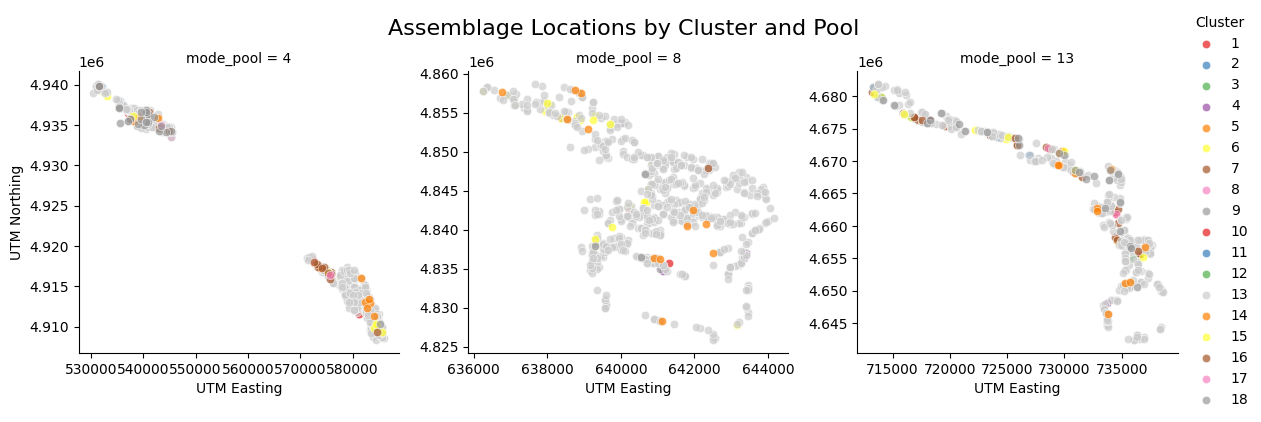

In [64]:
# Find the cluster with the largest count
cluster_sizes = agg_df['cluster'].value_counts()
largest_cluster = agg_df['cluster'].value_counts().idxmax()
unique_clusters = sorted(agg_df['cluster'].unique())
size_map = {c: f"{cluster_sizes[c]} sites" for c in unique_clusters}
palette = sns.color_palette("Set1", n_colors=len(unique_clusters))
light_color = (0.8, 0.8, 0.8)  # RGB for light gray

# Assign palette, but set largest cluster to light gray
color_map = {c: col for c, col in zip(unique_clusters, palette)}
color_map[largest_cluster] = light_color

g = sns.FacetGrid(
    agg_df,
    col="mode_pool",
    hue="cluster",
    palette=color_map,
    col_wrap=3,
    height=4,
    sharex=False,
    sharey=False
)
g.map_dataframe(sns.scatterplot, x="utm_e", y="utm_n", alpha=0.7)
g.add_legend(title="Cluster")
g.set_axis_labels("UTM Easting", "UTM Northing")
g.figure.subplots_adjust(top=0.85)
g.figure.suptitle("Assemblage Locations by Cluster and Pool", fontsize=16)
plt.show()

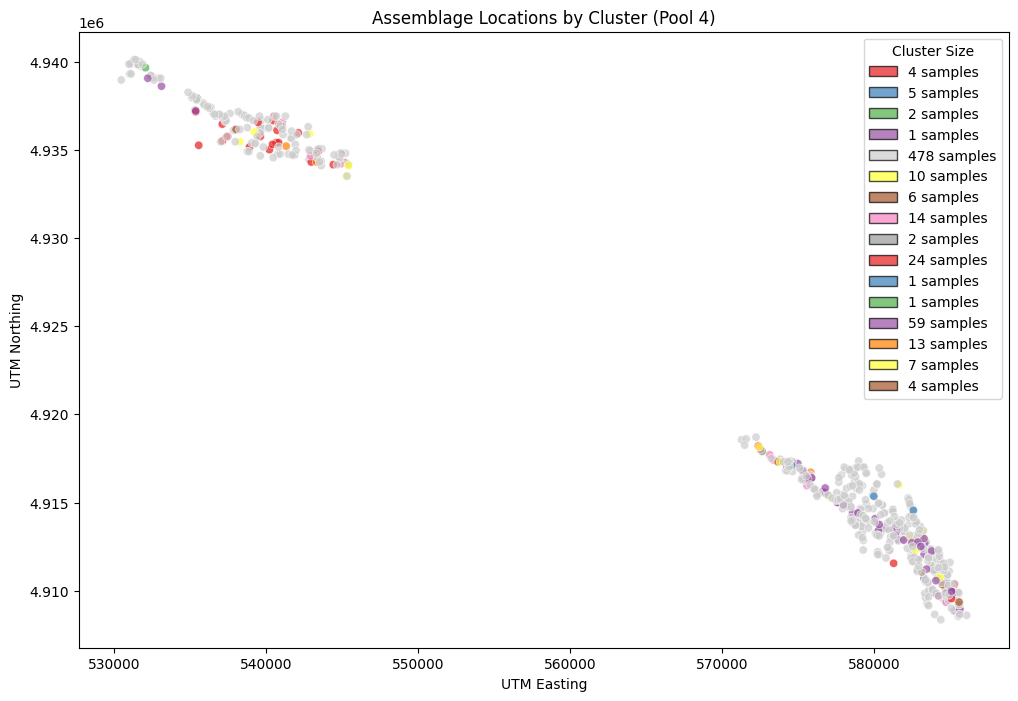

In [65]:
from matplotlib.patches import Patch

# FILTER by pool
pool_filter = 4
available_pools = sorted(agg_df['mode_pool'].unique().tolist())

if pool_filter not in available_pools:
    print(f"No rows for mode_pool == {pool_filter}. Available pools: {available_pools}")
else:
    df_pool = agg_df[agg_df['mode_pool'] == pool_filter].copy()
    df_pool['cluster'] = df_pool['cluster'].astype(str)

    #  Map cluster labels to cluster sizes for legend
    cluster_sizes_pool = df_pool['cluster'].value_counts()
    unique_clusters_pool = sorted(df_pool['cluster'].unique())

    palette = sns.color_palette("Set1", n_colors=len(unique_clusters_pool) or 1)
    light_color = (0.8, 0.8, 0.8)  # RGB for light gray
    color_map = {c: col for c, col in zip(unique_clusters_pool, palette)}
    if not cluster_sizes_pool.empty:
        largest_cluster_pool = cluster_sizes_pool.idxmax()
        color_map[largest_cluster_pool] = light_color
    size_map = {c: f"{cluster_sizes_pool[c]} samples" for c in unique_clusters_pool}

    # Plot with legend showing cluster size
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=df_pool,
        x="utm_e",
        y="utm_n",
        hue="cluster",
        palette=color_map,
        alpha=0.7
    )

    legend_handles = [Patch(facecolor=color_map[c], edgecolor='k', alpha=0.7) for c in unique_clusters_pool]
    legend_labels = [size_map[c] for c in unique_clusters_pool]
    if legend_handles:
        plt.legend(handles=legend_handles, labels=legend_labels, title="Cluster Size")
    plt.xlabel("UTM Easting")
    plt.ylabel("UTM Northing")
    plt.title(f"Assemblage Locations by Cluster (Pool {pool_filter})")
    plt.show()

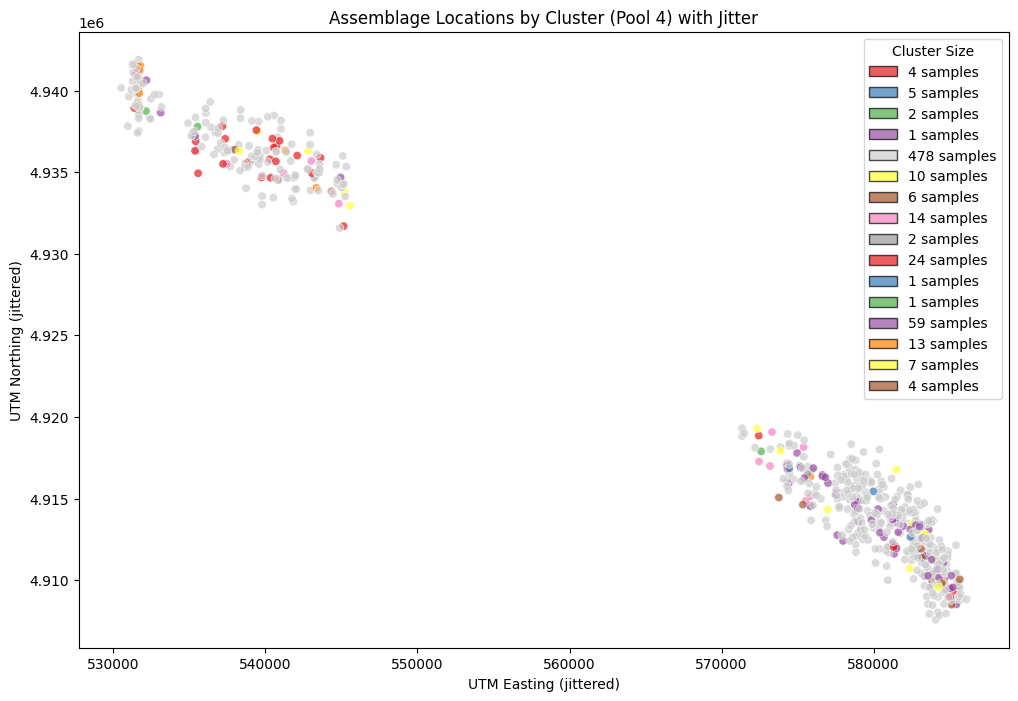

In [66]:
# Add jitter to UTM coordinates
rng = np.random.default_rng(seed=42)
jitter_scale = [100, 1000]  # Adjust as needed for your data scale
df_pool['utm_e_jitter'] = df_pool['utm_e'] + rng.normal(0, jitter_scale[0], size=len(df_pool))
df_pool['utm_n_jitter'] = df_pool['utm_n'] + rng.normal(0, jitter_scale[1], size=len(df_pool))

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df_pool,
    x="utm_e_jitter",
    y="utm_n_jitter",
    hue="cluster",
    palette=color_map,
    alpha=0.7
)

# Recompute size map using string cluster labels (df_pool['cluster'] already cast to str in earlier cell)
unique_clusters_pool = sorted(df_pool['cluster'].unique())
cluster_sizes_pool = df_pool['cluster'].value_counts()
size_map_pool = {c: f"{cluster_sizes_pool[c]} samples" for c in cluster_sizes_pool.index}

legend_handles = [Patch(facecolor=color_map[c], edgecolor='k', alpha=0.7) for c in unique_clusters_pool]
legend_labels = [size_map_pool[c] for c in unique_clusters_pool]

plt.legend(handles=legend_handles, labels=legend_labels, title="Cluster Size")
plt.xlabel("UTM Easting (jittered)")
plt.ylabel("UTM Northing (jittered)")
plt.title(f"Assemblage Locations by Cluster (Pool {pool_filter}) with Jitter")
plt.show()

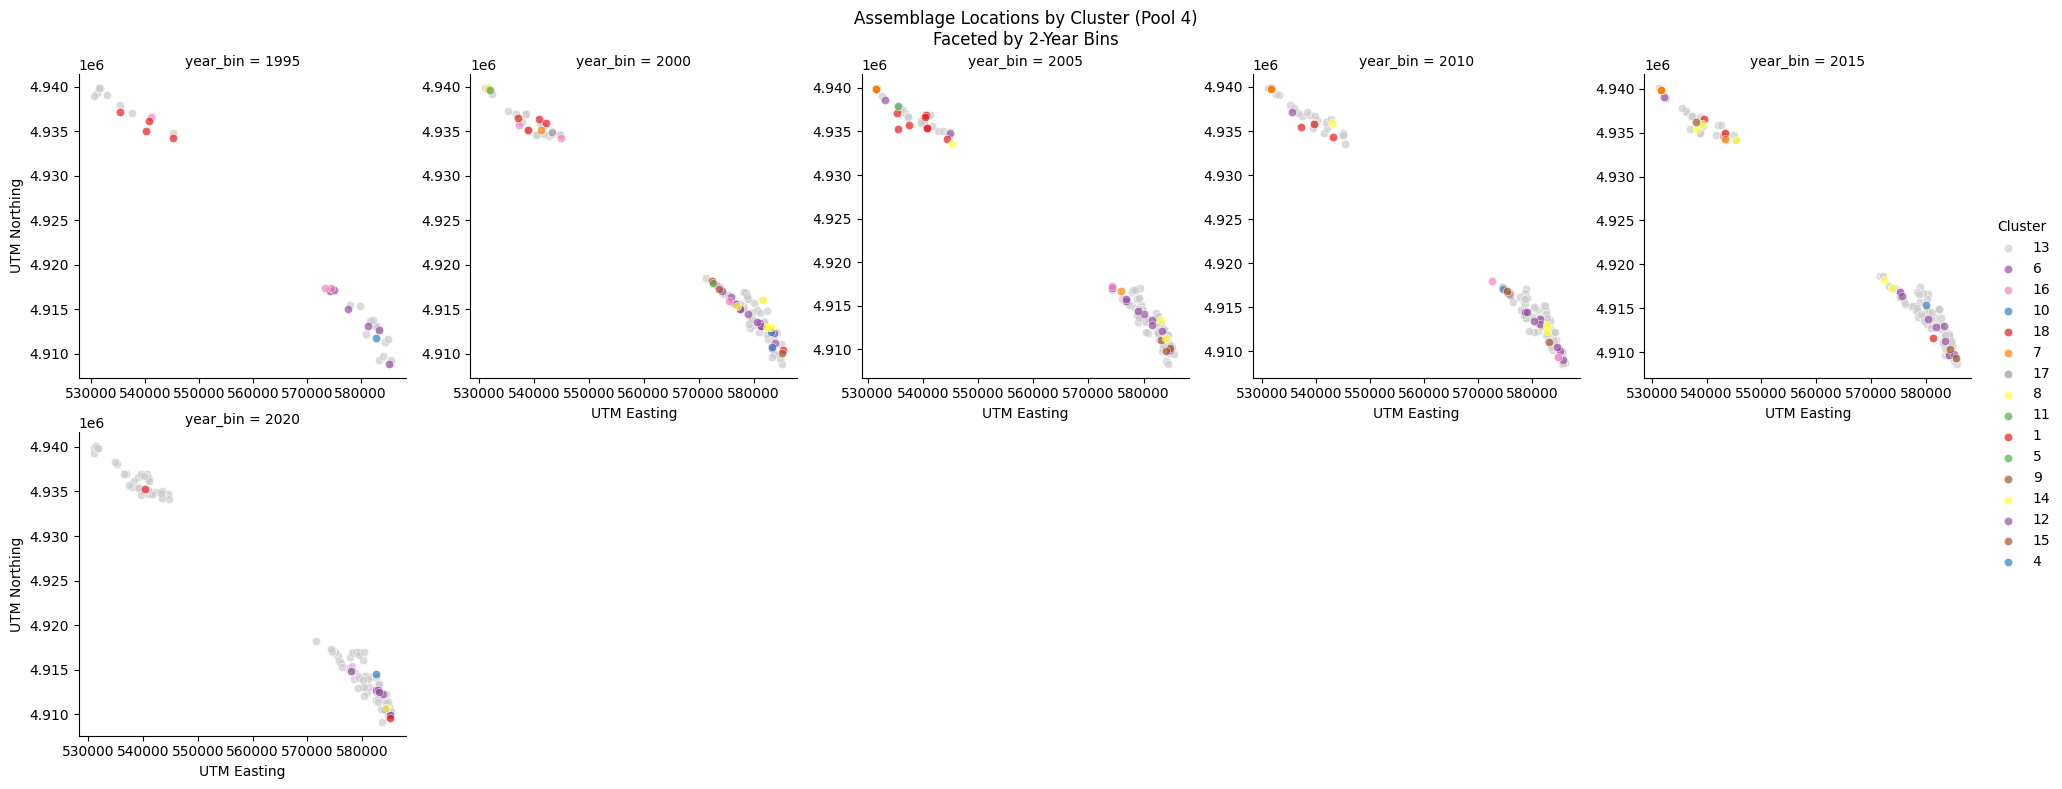

In [69]:
# Create a new column for year bins
df_pool['year_bin'] = (df_pool['year'] // 5) * 5

# Create the FacetGrid
g = sns.FacetGrid(
    df_pool,
    col="year_bin",
    col_wrap=5,
    height=4,
    sharex=False,
    sharey=False,
    hue="cluster",
    palette=color_map
)
g.map_dataframe(
    sns.scatterplot,
    x="utm_e",
    y="utm_n",
    alpha=0.7
)
g.add_legend(title="Cluster")
g.set_axis_labels("UTM Easting", "UTM Northing")
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle("Assemblage Locations by Cluster (Pool {})\nFaceted by 2-Year Bins".format(pool_filter))
plt.show()

Homogenization of largest cluster over time?

## Cluster Characteristics

We next inspected how each cluster varied in it’s species composition.

We will produce three vertical heatmaps for the Jaccard clustering method. Each heatmap shows the average percent presence of each fish species (rows) within each cluster (columns).

*What the graph means:*

-   **Columns**: Each column is a cluster of assemblages (sites grouped by fish community similarity).
-   **Rows**: Each row is a fish species (only those present in >10% of any cluster).
-   **Cell values**: The number in each cell is the percent of assemblages in that cluster where the species is present (0–100%).
-   **Color**: Darker blue = higher percent presence.
-   **Interpretation**: You can see which species are common or rare in each cluster, and how species composition differs between clusters and clustering methods.

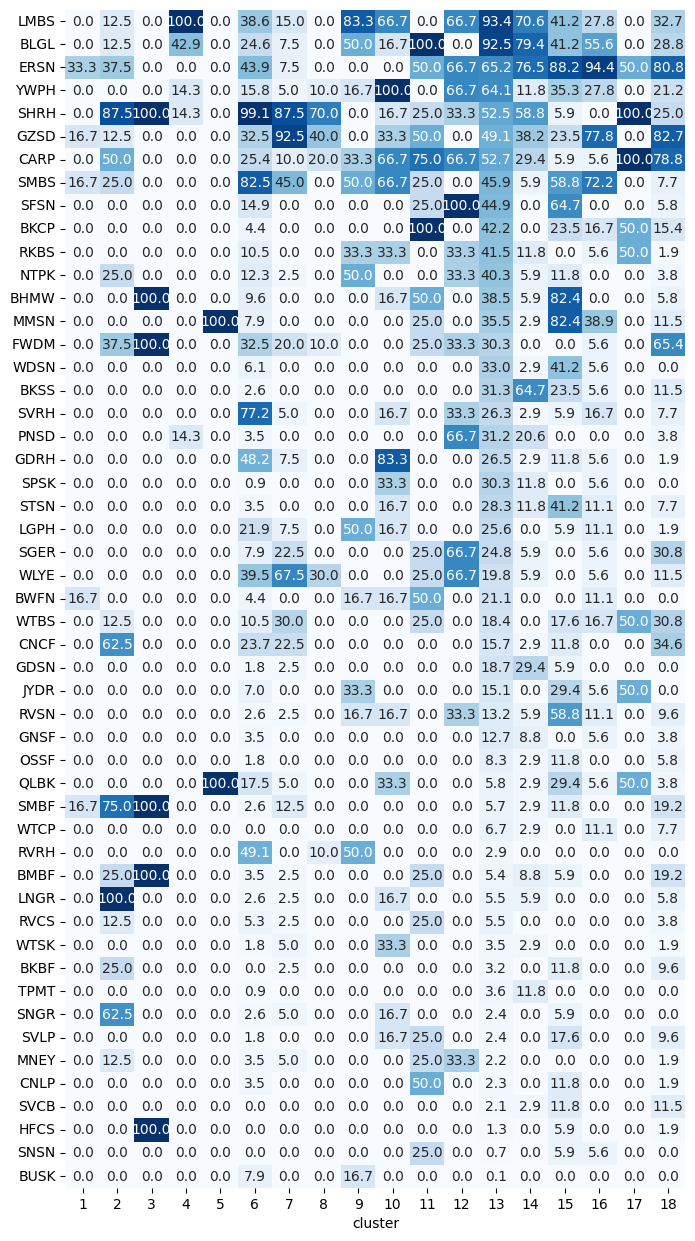

In [60]:
# Order species by overall frequency of occurrence (sum across columns)
species_cols = [c for c in fish_df.columns if c not in ['richness', 'cluster']]
species_order = fish_df[species_cols].sum(axis=0).sort_values(ascending=False).index.tolist()

# Compute percent presence per cluster using agg_df (which has 'cluster')
fish_df['cluster'] = agg_df['cluster']
jac_comp = fish_df.groupby('cluster')[species_order].mean() * 100

# Keep species present in >10% of at least one cluster
filt = jac_comp.max() > 10
jac_comp = jac_comp.loc[:, filt]

# Plot heatmap (species as rows)
plt.figure(figsize=(8, 0.3 * jac_comp.shape[1]))
sns.heatmap(jac_comp.T, cmap='Blues', annot=True, fmt=".1f", cbar=False)
plt.show()

Notice difference between largemouth bass and smallmouth bass. For example, cluster 4 vs. 6.

# Hydrological EDA

For each clustering method, we can visualize how the clusters differ in terms of hydrological variables. Below are boxplots for each variable, faceted by clustering method. Each boxplot shows the distribution of the variable within each cluster.

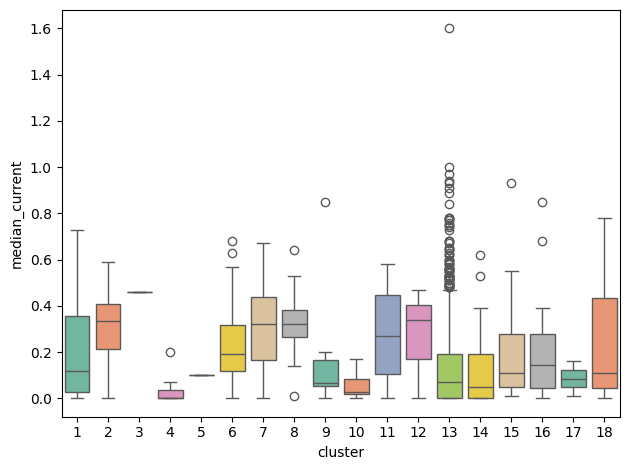

In [62]:
import matplotlib.pyplot as plt

sns.boxplot(x='cluster', y='median_current', hue='cluster', data=agg_df, palette='Set2', legend=False)
plt.tight_layout()
plt.show()

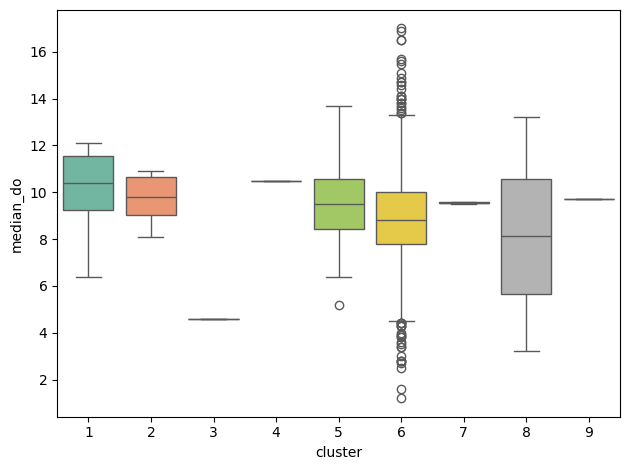

In [27]:
sns.boxplot(x='cluster', y='median_do', hue='cluster', data=agg_df, palette='Set2', legend=False)
plt.tight_layout()
plt.show()

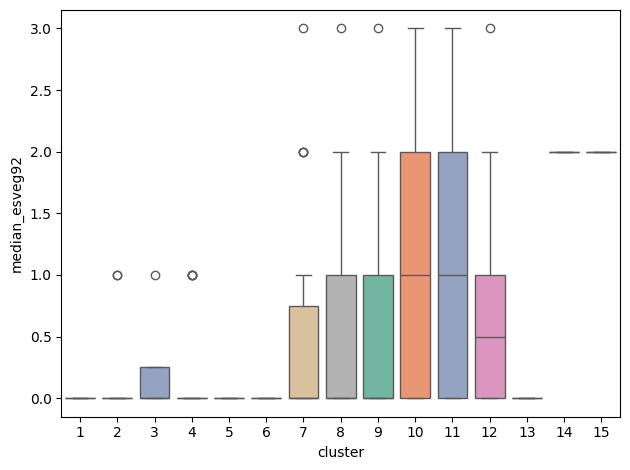

In [31]:
sns.boxplot(x='cluster', y='median_esveg92', hue='cluster', data=agg_df, palette='Set2', legend=False)
plt.tight_layout()
plt.show()

## Decision Tree

In [32]:
agg_df.head()

,barcode,year,utm_e,utm_n,median_temp,median_depth,median_current,median_do,median_esveg92,mode_substrt,median_cond,snag_present,riprap_present,inout_present,flooded_present,mode_pool,RKBS,LGPH,BKSB,SBWB,GSPK,GSOS,CARP,PGMW,BNBH,CNLP,BSDR,LNGR,QLBK,NFSH,ERSN,BMBF,NTPK,OSSF,PRPH,RESF,LMBS,NHSK,STSN,SMBS,SNSN,WTSK,GDRH,SHCB,ABLP,GDSN,RVRH,TPMT,BHMW,PSBG,FWDM,SFSN,SVCB,MQTF,CMMW,GSPS,YWPH,CNCF,SHDR,YWBS,HFCS,WTCP,PNSD,SGWE,BUSK,RVSN,SVMW,PDFH,SGER,SNGR,GSBG,MMSN,BKSS,BDDR,BGWM,SPSK,JYDR,LKSG,GNSF,FHMW,BKBF,BKCP,GZSD,CLDR,WTBS,FHCF,RRDR,WDSN,WSDR,YLBH,WRMH,SVLP,STCT,PDSN,SVRH,LSSR,BNMW,WLYE,PSWM,TTPH,BKBH,IODR,BWFN,SMBF,BRBT,MDDR,MNEY,SHRH,BLGL,RVCS,cluster
0,11004513,2004,584880.0,4909558.0,20.7,2.0,0.19,7.3,1.0,4.0,472.0,0.0,1.0,0.0,0.0,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,11
1,11004514,2004,584930.0,4911108.0,17.3,2.2,0.26,5.1,1.0,1.0,297.0,1.0,0.0,0.0,0.0,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,11
2,11004515,2004,583630.0,4912208.0,20.2,0.5,0.08,7.6,2.0,3.0,317.0,1.0,0.0,0.0,0.0,4,True,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,11
3,11004517,2004,583380.0,4909608.0,20.1,1.3,0.09,6.3,3.0,3.0,474.0,0.0,0.0,0.0,0.0,4,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,11
4,11004518,2004,581180.0,4913108.0,20.0,2.8,0.12,6.1,1.0,4.0,472.0,0.0,1.0,0.0,0.0,4,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,11


In [33]:
train_features = ['median_temp', 'median_esveg92', 'mode_substrt', 'median_current']

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(agg_df[train_features], agg_df['cluster'], test_size=0.2, random_state=42, shuffle=True)

clf = DecisionTreeClassifier(max_depth = 2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [35]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


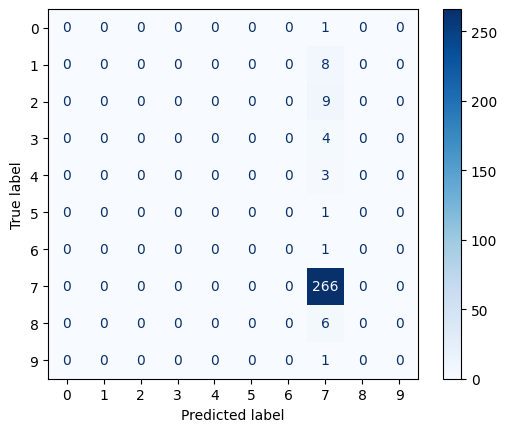

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can customize the colormap

plt.show()

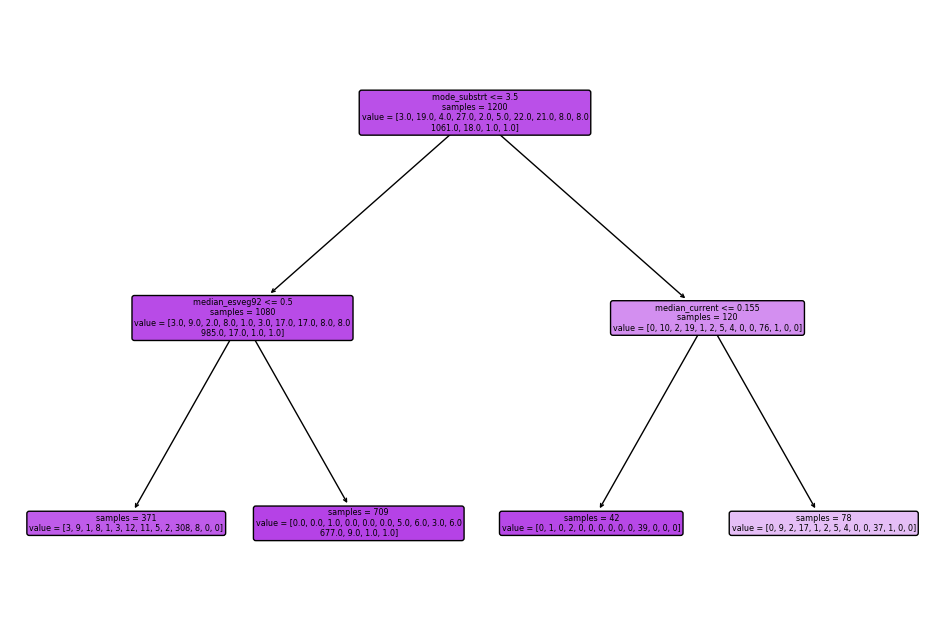

In [ ]:
from sklearn.tree import plot_tree

# Assuming `clf` is your trained DecisionTreeClassifier model
plt.figure(figsize=(12,8))  # Adjust the size to fit your tree
plot_tree(clf, filled=True, feature_names=train_features,  class_names=['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'], rounded=True, impurity=False)
plt.show()